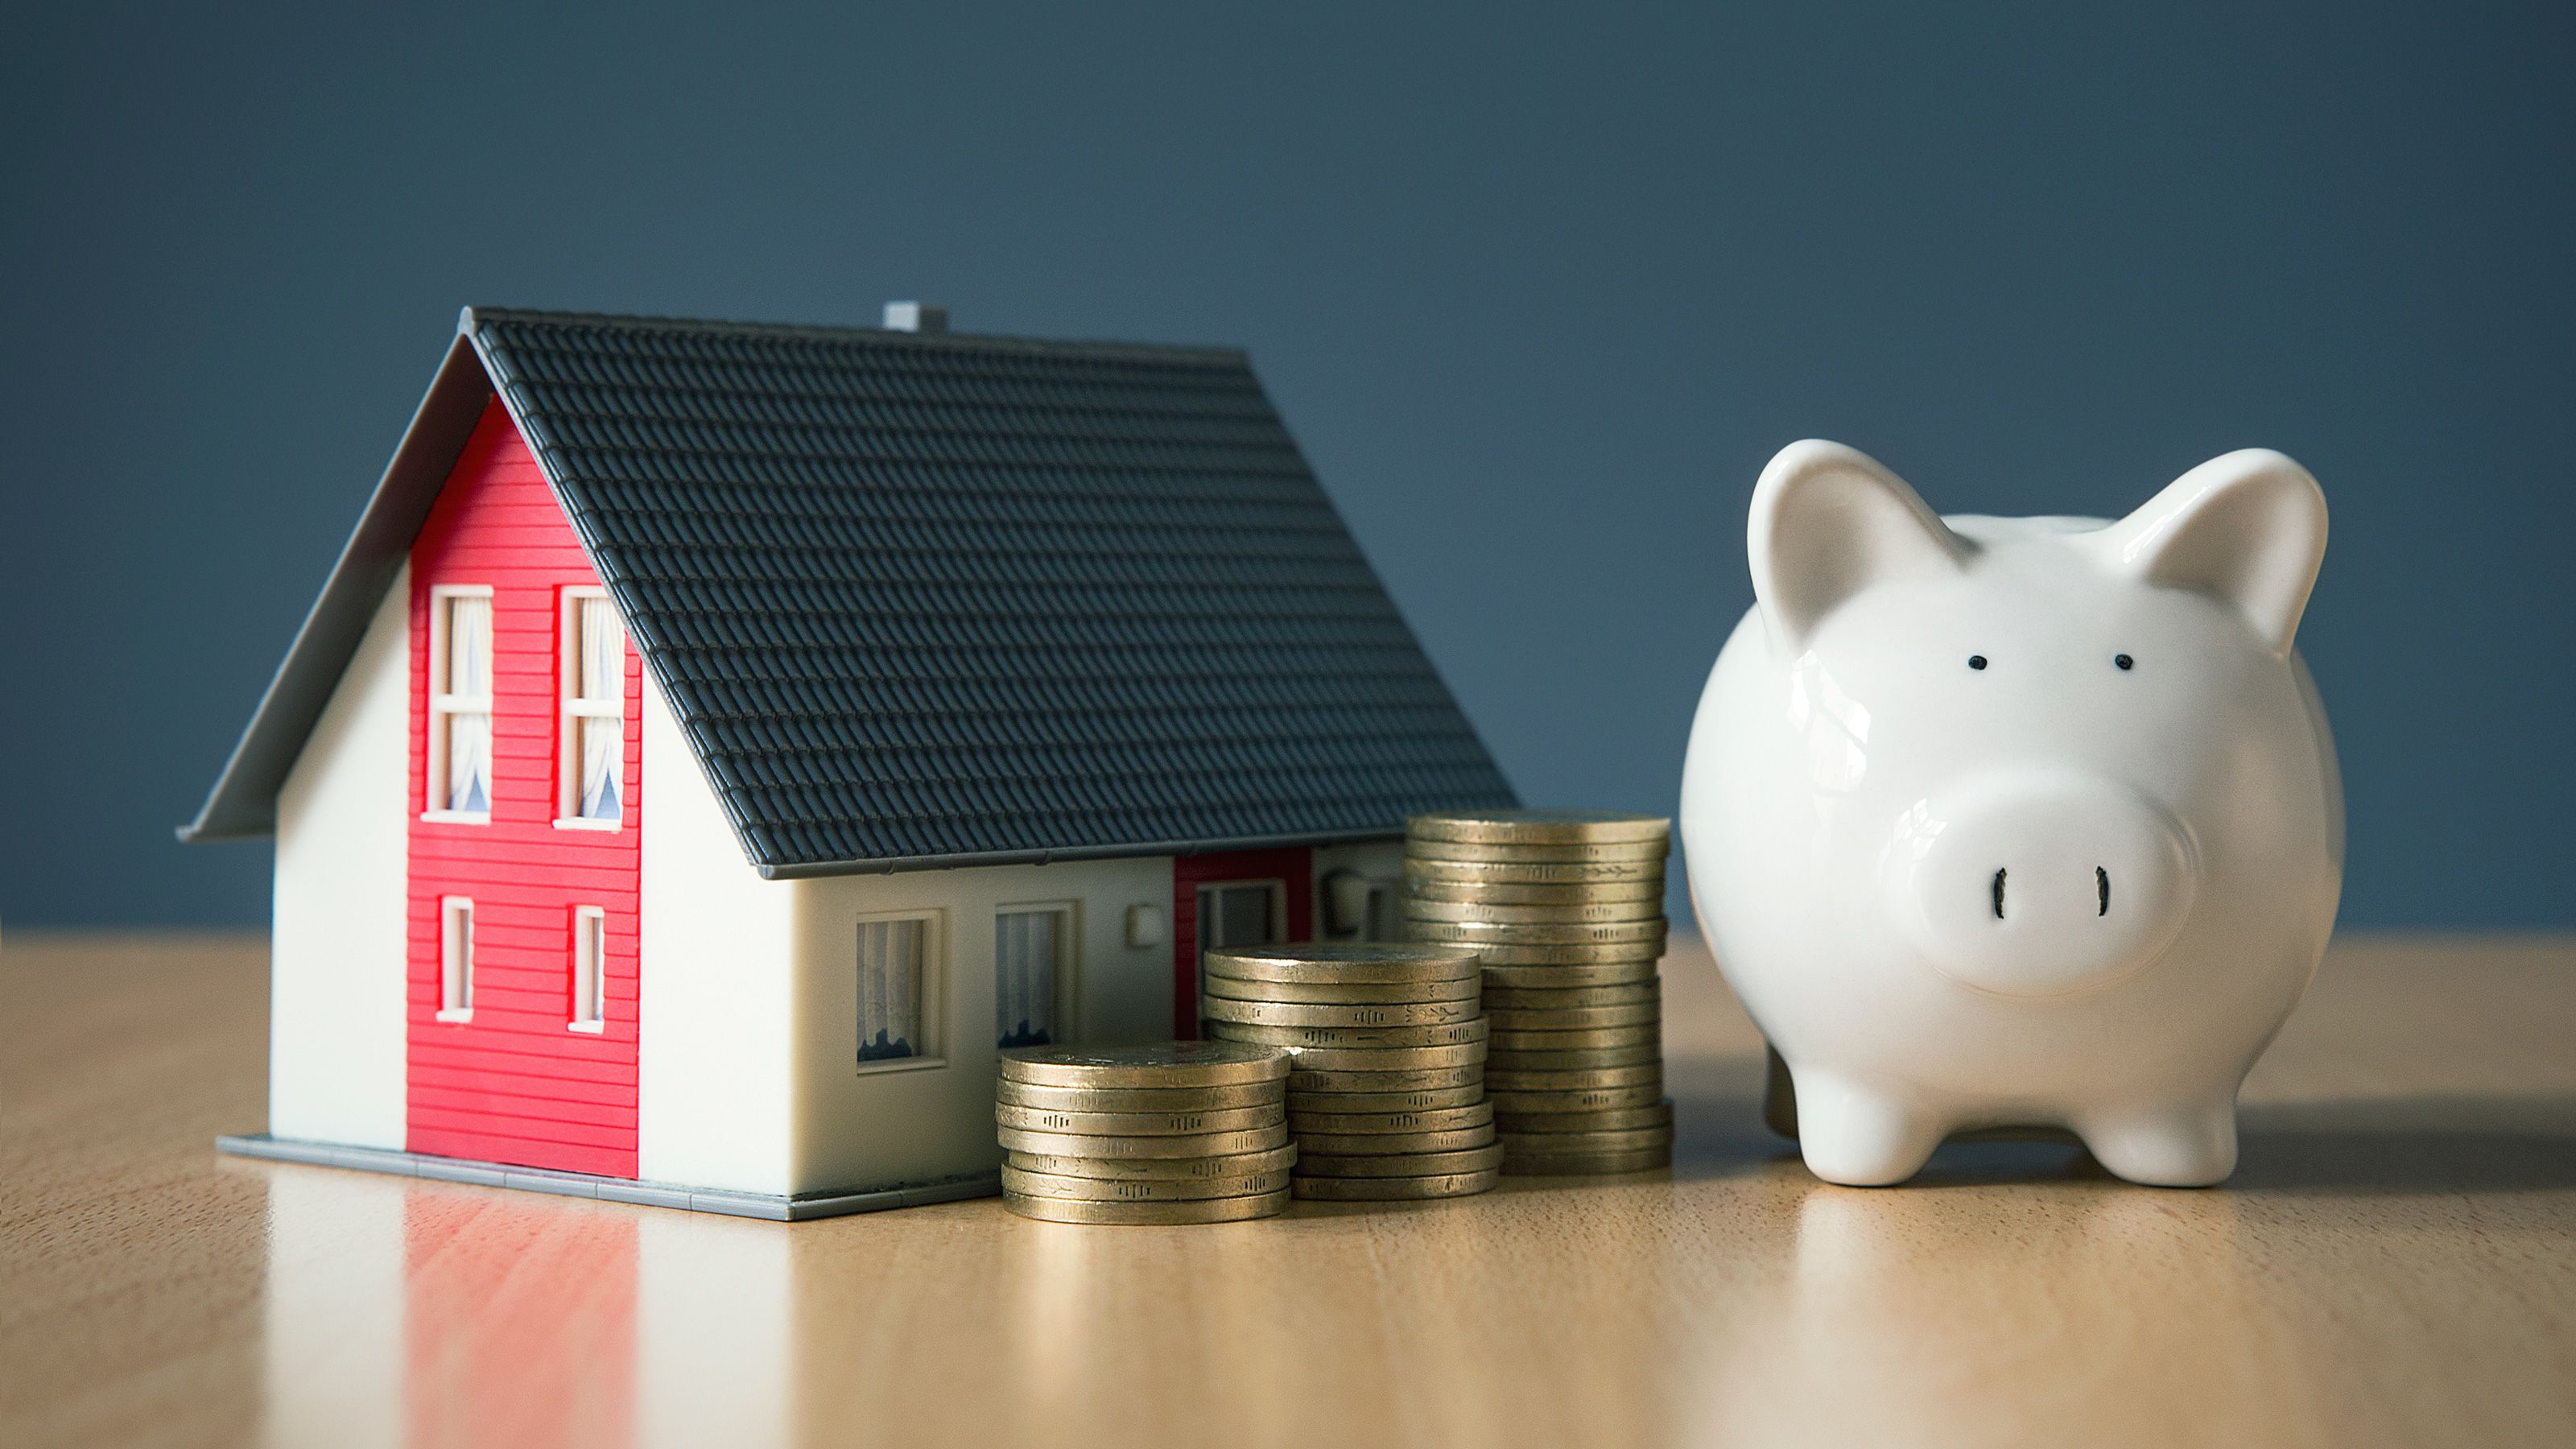

# Project 2: Predicting Sales Price Using Ames, IO Housing Data
---

## Problem Statement

In today's highly dynamic housing market, where sales prices are in a constant state of flux and on an upward trajectory, it is becoming increasingly important to make informed choices about finding the right home. This decision will impact not only ones immediate quality of life but also future financial opportunity. Housing prices have increased by 48.55% over the last decade and experts project they will continue to rise into the future ([*1*](https://www.cnbc.com/select/how-much-will-a-home-in-the-us-cost-by-2030/)). By identifying trends and understanding how different factors affect each other, potential or current homeowners may be able to maximize the net worth of their properties and strategically buy, remodel, or maintain homes that will appreciate. 

In this analysis we will build a linear regression model (using LassoCV regularization and testing RidgeCV regularization) of key features which can be used in predicting house prices. We will start in this notebook by exploring and cleaning our data, transforming our variables into model-ready form ([second notebook](../code/02_Feature_Engineering.ipynb)), and ultimately iterating across various features to find which ones are most associated with sales price after accounting for the interplay between variables ([third notebook](../code/03_Model_Building.ipynb)). At the end of this assignment, potential and seasoned homeowners will understand which features to look for in a home to maximize the return on their investment - either by way of a longterm satisfaction with their property or by high resale value.

For more information on the background, [data](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt), and a summary of methods and findings, please see the associated [README](../Farah_Malik_Proj2_README.md) for this analysis.

### Contents:
- [I. Understanding the Data and Cleaning](#I.-Understanding-the-Data-and-Cleaning)
    - [Look at Columns, Data Types, and Missings](#Look-at-Columns,-Data-Types,-and-Missings)
    - [Correlation Matrix to Focus Downstream Exploration](#Correlation-Matrix-to-Focus-Downstream-Exploration)
    - [Outlier Exploration](#Outlier-Exploration)  
    - [Imputing Data for Missing Values](#Imputing-Data-for-Missing-Values)  
- [II. Exploratory Data Analysis and Visualization](#II.-Exploratory-Data-Analysis-and-Visualization)
    - [Descriptive Statistics](#What-are-the-Descriptive-Statistics-of-the-Initial-Features-Identified?)  
    - [Zoning Areas](#Which-Zoning-Areas-Have-the-Highest-Value-Homes-and-Are-All-Zones-Relevant-to-Analysis?) 
    - [Price by Year Sold](#What-is-the-Median-Home-Price-By-Year-Sold?-Are-There-Notable-Patterns-(E.g.,-Price-Drops-in-2008-2010-During-Economic-Recession)?) 
    - [Lot Configuration](#What-is-the-Relationship-Between-Lot-Configuration-and-Sale-Price?)  
    - [Neighborhoods](#What-Does-it-Look-Like-When-We-Compare-Neighborhood-to-SalePrice,-Overall-Quality-and-Condition,-or-Against-Desirable-Location-Features-(Proximity-to-Various-Conditions)
    - [Age of House (Original and Remodeled) and Sale Price](#Are-Newer-Houses-Selling-for-Higher?-What-Does-it-Look-Like-When-We-Compare-Newer-Houses-to-Remodeled-Ones?)
    - [Impact of Basement, Fireplace, Garage, Kitchen](#What-Impact-Does-Having-a-Basement-(Finished/Unfinished)-Have-on-Price,-How-About-a-Fireplace,-or-Garage?)

## I. Understanding the Data and Cleaning
---

#### Look at Columns, Data Types, and Missings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
hs = pd.read_csv('../datasets/train.csv', na_values=['NaN', '', 'Missing'], keep_default_na=False)
hs.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [3]:
hs_default = pd.read_csv('../datasets/train.csv')

In [4]:
hs_test = pd.read_csv('../datasets/test.csv', na_values=['NaN', '', 'Missing'], keep_default_na=False)
hs_test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0      NA   
1    NA       IR1          Lvl  ...          0            0         0      NA   
2    NA       IR1          Lvl  ...          0            0         0      NA   
3    NA       Reg          Lvl  ...          0            0         0      NA   
4    NA       IR1          Lvl  ...          0          185         0      NA   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0    NA           NA        0       4     2006        WD   
1    NA           NA        0       8     2006        WD   
2    NA           NA        0       9     2006        New  
3    NA           NA        0       7     2007        WD   
4    NA           NA        0       7     2009        WD   

[5 rows x 80 columns]

In [5]:
pd.set_option('display.max_columns', None) #source: https://pandas.pydata.org/docs/user_guide/options.html
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
hs.dtypes

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

In [6]:
# No longer needed - read in data to not treat NA as null
# hs['Garage Finish'] = hs['Garage Finish'].replace("NA", "NG")
# hs['Garage Qual'] = hs['Garage Qual'].replace("NA", "NG")
# hs['Garage Cond'] = hs['Garage Cond'].replace("NA", "NG")
# hs['Garage Type'] = hs['Garage Type'].replace("NA", "NG")
# hs['Bsmt Exposure'] = hs['Bsmt Exposure'].replace("NA", "NB")
# hs['BsmtFin Type 2'] = hs['BsmtFin Type 2'].replace("NA", "NB")
# hs['BsmtFin Type 1'] = hs['BsmtFin Type 1'].replace("NA", "NB")
# hs['Bsmt Cond'] = hs['Bsmt Cond'].replace("NA", "NB")
# hs['Bsmt Qual'] = hs['Bsmt Qual'].replace("NA", "NB")

In [7]:
hs.isnull().sum().sort_values(ascending=False)

Lot Frontage       330
Garage Yr Blt      114
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Exposure        4
BsmtFin Type 2       2
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Cond          1
Bsmt Qual            1
Garage Finish        1
Garage Cars          1
Garage Area          1
Garage Qual          1
Total Bsmt SF        1
BsmtFin Type 1       1
Bsmt Cond            1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Kitchen AbvGr        0
Id                   0
Fireplaces           0
Fireplace Qu         0
Sale Type            0
Yr Sold              0
Mo Sold              0
Misc Val             0
Misc Feature         0
Fence                0
Pool QC              0
Pool Area            0
Screen Porch         0
3Ssn Porch           0
Enclosed Porch       0
Open Porch SF        0
Wood Deck SF         0
Paved Drive

In [8]:
hs.isnull().mean().sort_values(ascending = False)

Lot Frontage       0.160897
Garage Yr Blt      0.055583
Mas Vnr Type       0.010726
Mas Vnr Area       0.010726
Bsmt Exposure      0.001950
BsmtFin Type 2     0.000975
Bsmt Full Bath     0.000975
Bsmt Half Bath     0.000975
Garage Cond        0.000488
Bsmt Qual          0.000488
Garage Finish      0.000488
Garage Cars        0.000488
Garage Area        0.000488
Garage Qual        0.000488
Total Bsmt SF      0.000488
BsmtFin Type 1     0.000488
Bsmt Cond          0.000488
BsmtFin SF 1       0.000488
BsmtFin SF 2       0.000488
Bsmt Unf SF        0.000488
Full Bath          0.000000
Half Bath          0.000000
Bedroom AbvGr      0.000000
Kitchen Qual       0.000000
TotRms AbvGrd      0.000000
Functional         0.000000
Kitchen AbvGr      0.000000
Id                 0.000000
Fireplaces         0.000000
Fireplace Qu       0.000000
Sale Type          0.000000
Yr Sold            0.000000
Mo Sold            0.000000
Misc Val           0.000000
Misc Feature       0.000000
Fence              0

In [9]:
hs_default.isnull().mean().sort_values(ascending=False)

Pool QC            0.995612
Misc Feature       0.968308
Alley              0.931741
Fence              0.804973
Fireplace Qu       0.487567
Lot Frontage       0.160897
Garage Finish      0.055583
Garage Qual        0.055583
Garage Yr Blt      0.055583
Garage Cond        0.055583
Garage Type        0.055095
Bsmt Exposure      0.028279
BsmtFin Type 2     0.027304
BsmtFin Type 1     0.026816
Bsmt Cond          0.026816
Bsmt Qual          0.026816
Mas Vnr Area       0.010726
Mas Vnr Type       0.010726
Bsmt Half Bath     0.000975
Bsmt Full Bath     0.000975
Garage Area        0.000488
Total Bsmt SF      0.000488
Bsmt Unf SF        0.000488
BsmtFin SF 2       0.000488
BsmtFin SF 1       0.000488
Garage Cars        0.000488
Mo Sold            0.000000
Sale Type          0.000000
Full Bath          0.000000
Half Bath          0.000000
Bedroom AbvGr      0.000000
Kitchen AbvGr      0.000000
Kitchen Qual       0.000000
Yr Sold            0.000000
Misc Val           0.000000
Pool Area          0

In [10]:
hs.shape

(2051, 81)

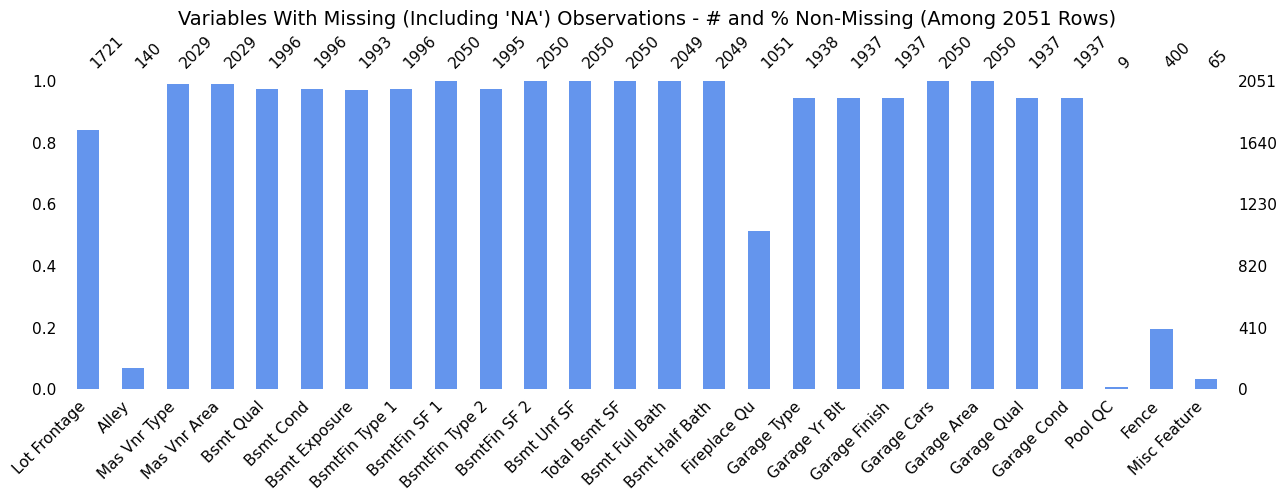

In [11]:
has_missing = hs_default.loc[:, hs_default.isnull().any()]
msno.bar(has_missing, figsize = (15,4), color="cornflowerblue", fontsize=11);
plt.title("Variables With Missing (Including 'NA') Observations - # and % Non-Missing (Among 2051 Rows)", fontsize=14);

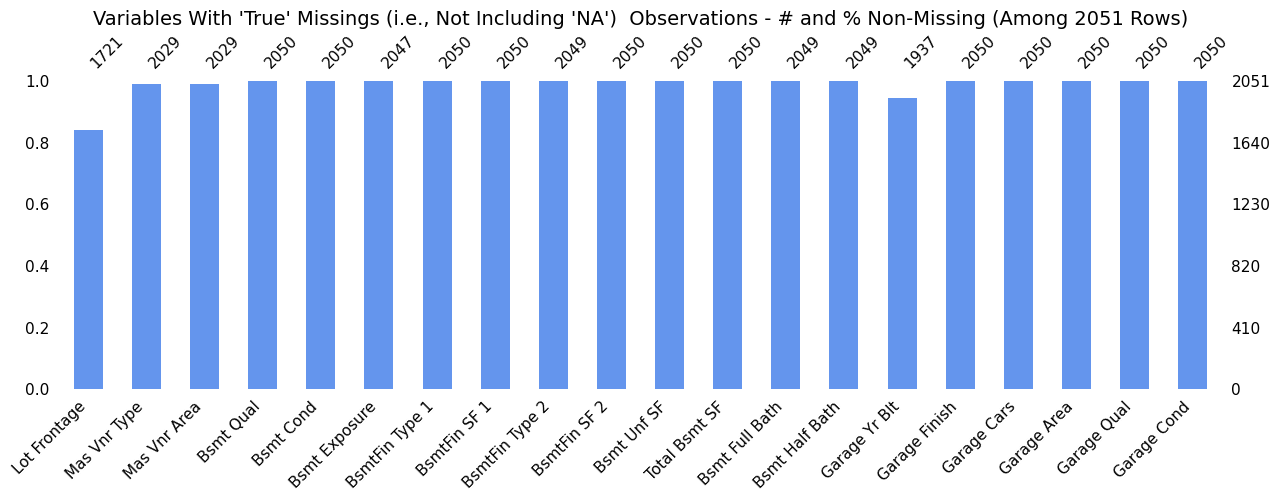

In [12]:
has_missing = hs.loc[:, hs.isnull().any()]
msno.bar(has_missing, figsize = (15,4), color="cornflowerblue", fontsize=11);
plt.title("Variables With 'True' Missings (i.e., Not Including 'NA')  Observations - # and % Non-Missing (Among 2051 Rows)", fontsize=14);

##### <span style='color: blue'> There were many variables with NA values, which represent "No [Feature]", for example "No Garage", "No Basement", "No Pool". We will drop those with ~80% of more NA's, as this relays there is no information to be given about the feature, and will handle the missings from other variables as we explore them and decide to use them as features in our model. </span>

In [13]:
# Pool QC, Misc Features, Alley, and Fence all have large amounts of data populated with NA, and they do not stand out as potential key features - to pare down dataset we will drop these variables
hs.drop(columns=['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'PID'], inplace = True)

In [14]:
hs.shape

(2051, 76)

#### Correlation Matrix to Focus Downstream Exploration

In [15]:
# I wanted to see if there was a correlation between number of bedrooms and number of bathrooms with SalePrice that was higher than either feature independently. This was not the case so I've removed this potential feature.
# hs['BrBa'] = hs['Bedroom AbvGr']*hs['Full Bath']

C:\Users\farah\AppData\Local\Temp\ipykernel_60652\1678754136.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = hs.corr()


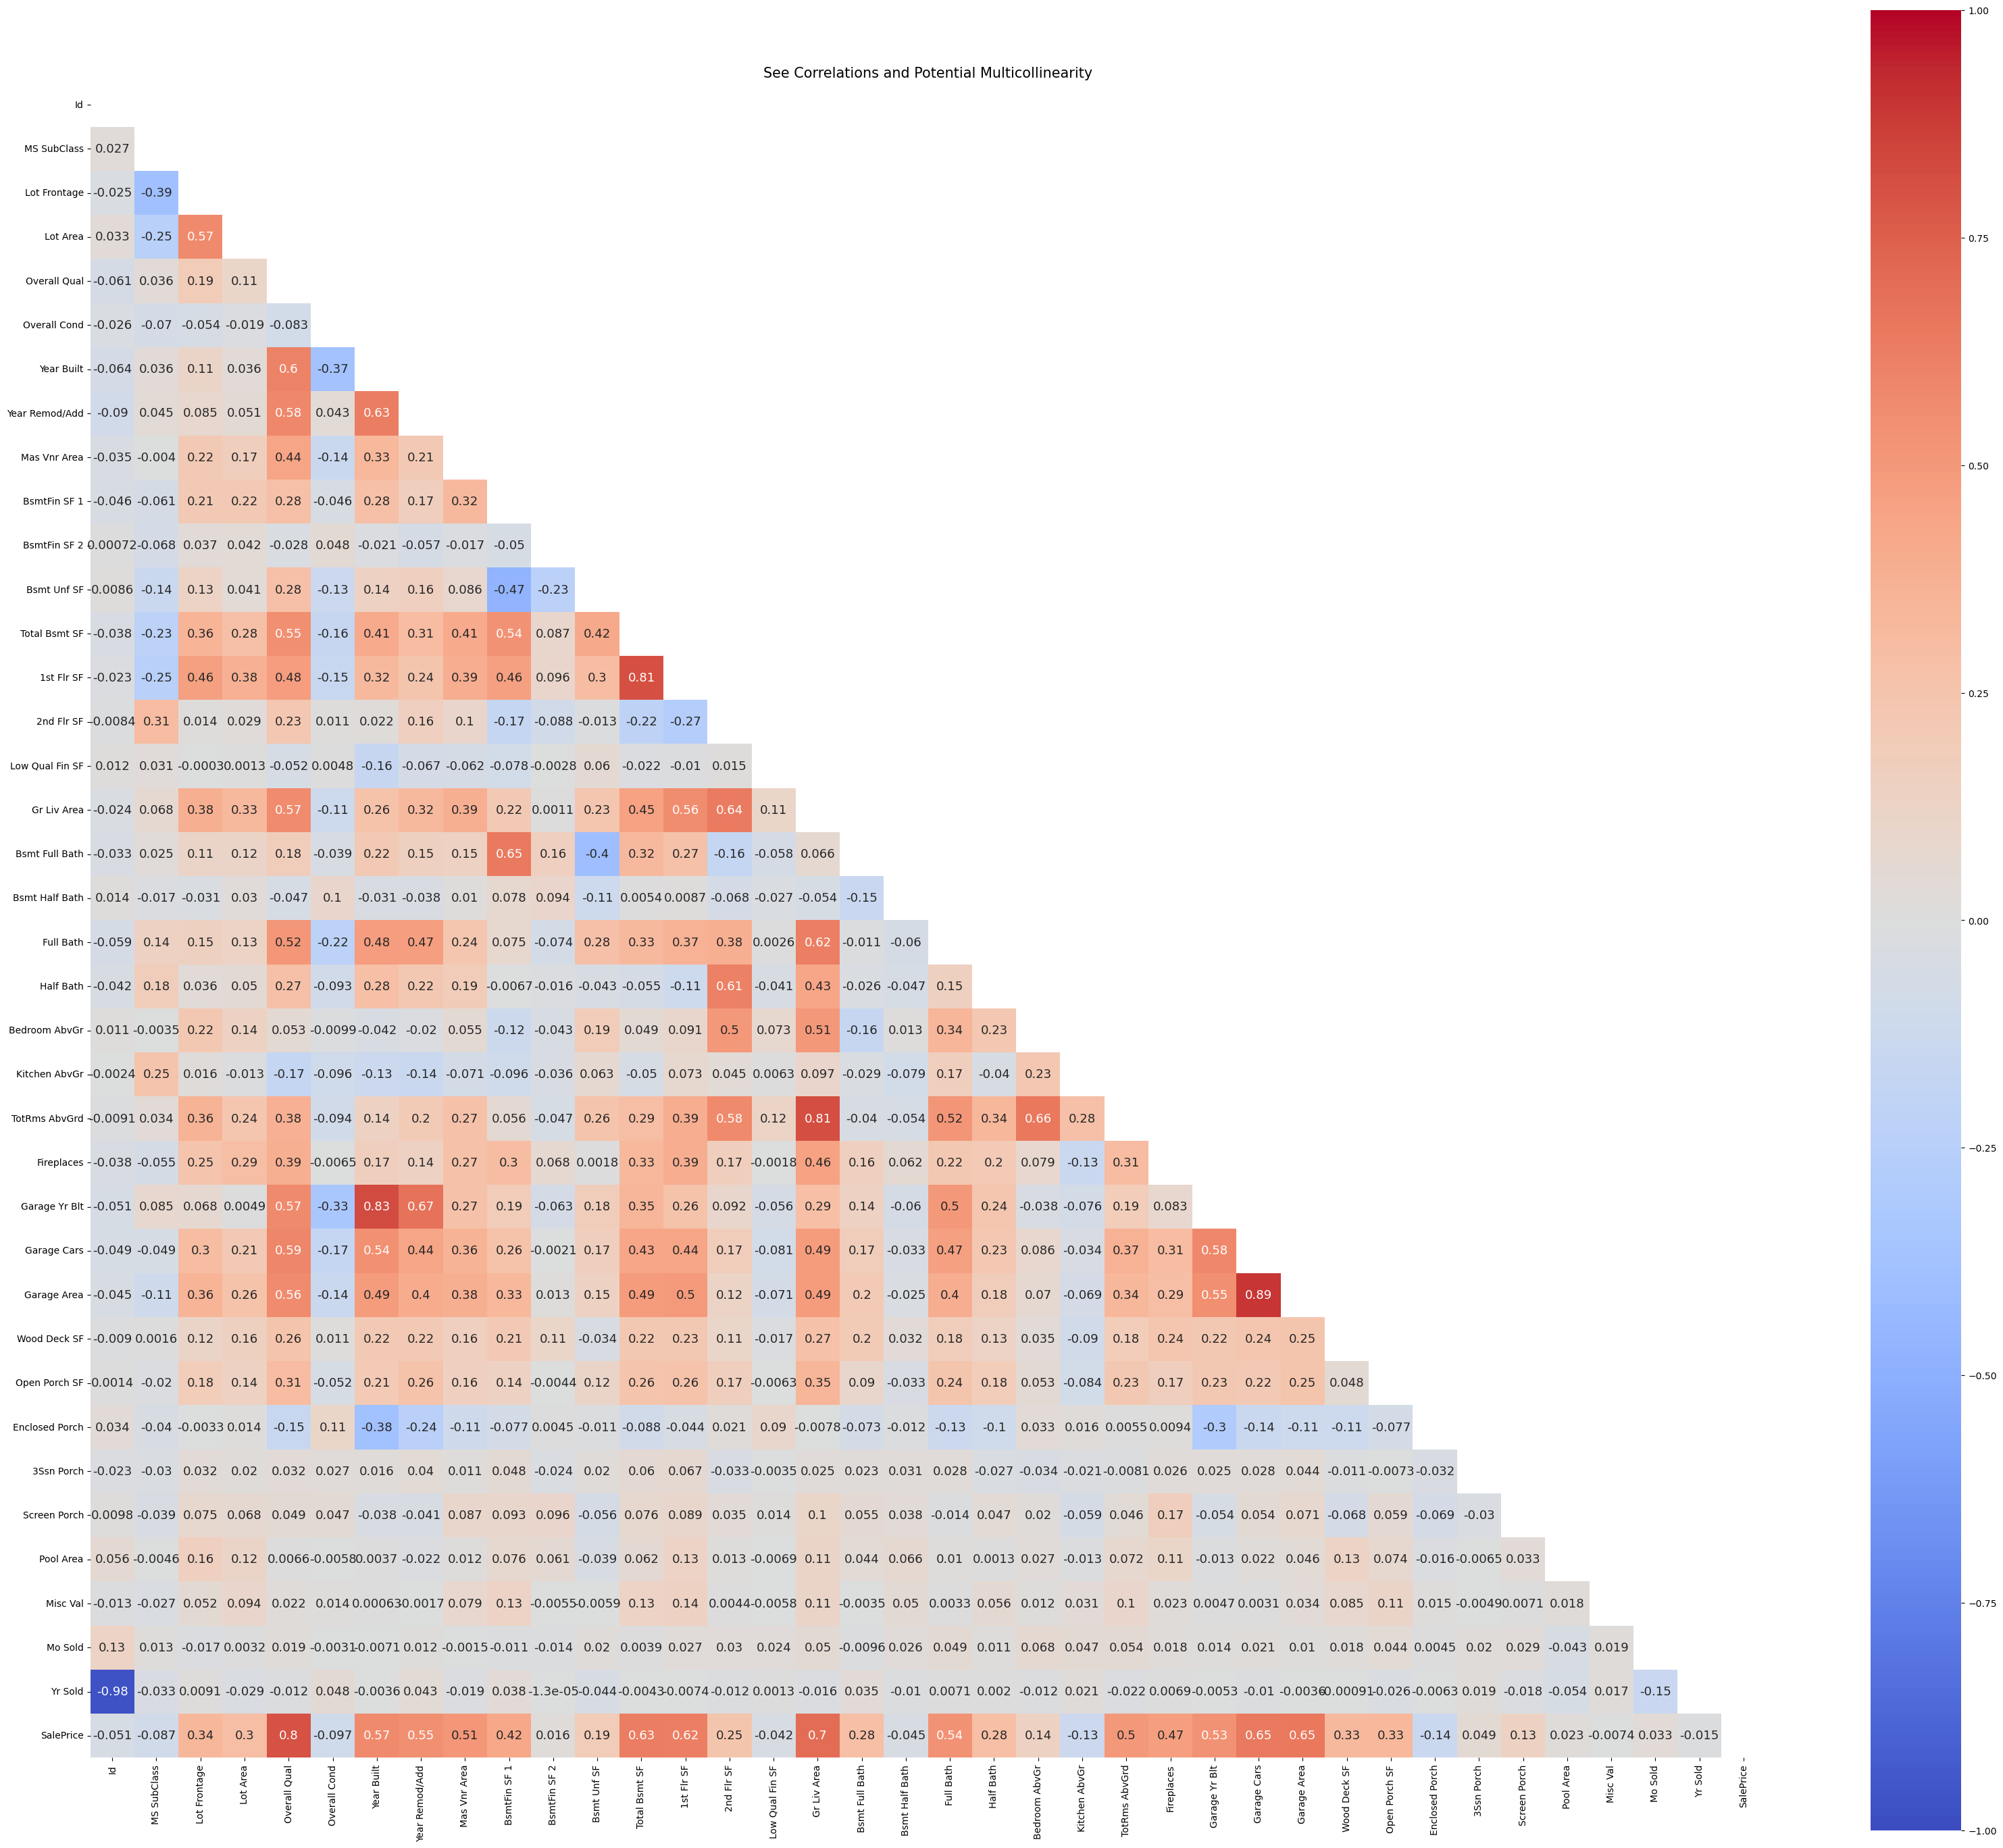

In [16]:
# Overall Look at Correlations
#Heatmap
plt.figure(figsize = (40,35))
corr = hs.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            mask = mask, 
            square = True, 
            cmap = 'coolwarm', 
            annot = True, 
            annot_kws={
                'fontsize': 13},
            vmin = -1, 
            vmax = 1)

plt.title("See Correlations and Potential Multicollinearity", fontsize =15);

##### <span style='color: blue'>Features correlating with SalePrice to focus on initially:</span>
- <span style='color: blue'>Overall Qual
- <span style='color: blue'>Year Built 
- <span style='color: blue'>Year Remod/Add
- <span style='color: blue'>BsmtFin SF1
- <span style='color: blue'>Total Bsmt SF
- <span style='color: blue'>Gr Liv Area
- <span style='color: blue'>Full Bath
- <span style='color: blue'>Fireplaces
- <span style='color: blue'>Garage Area </span>

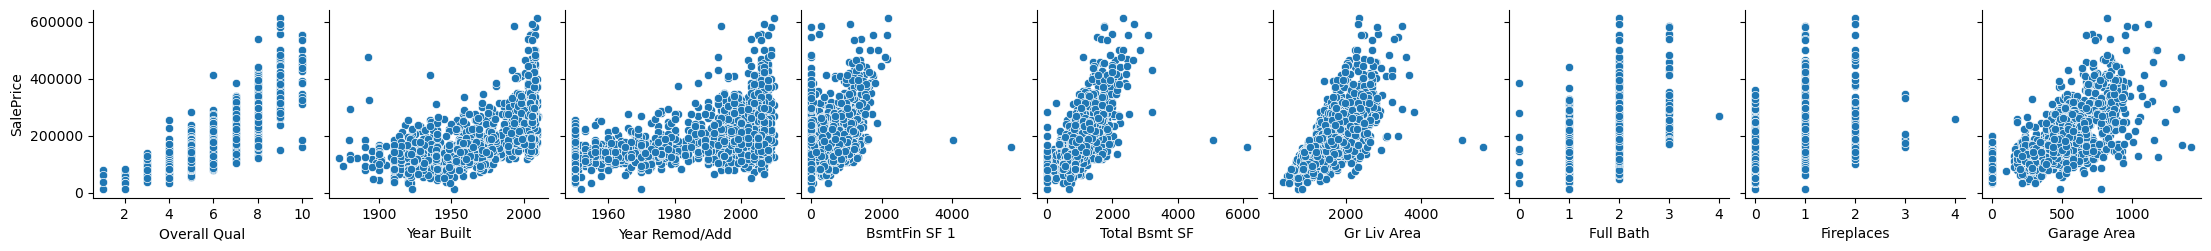

In [17]:
feats_initial = ['Overall Qual', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 'Fireplaces', 'Garage Area']
sns.pairplot(hs, x_vars= feats_initial, y_vars = ['SalePrice']);

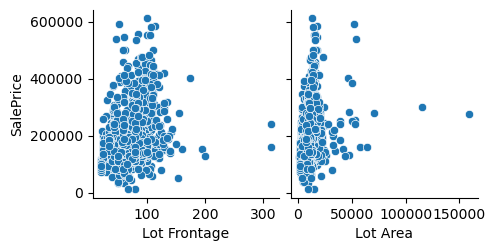

In [18]:
# Sqft / inside area appear to be strong predictors, look also at outside lot area/size
sns.pairplot(hs, x_vars= ['Lot Frontage', 'Lot Area'], y_vars = ['SalePrice']);

##### <span style='color: blue'>It looks like there are a number of outliers we may explore further (e.g., Gr Liv Area, Total Bsmt SF and BsmtFin SF1, Lot Frontage and Lot Area, potentially Garage Area).</span>

#### Outlier Exploration

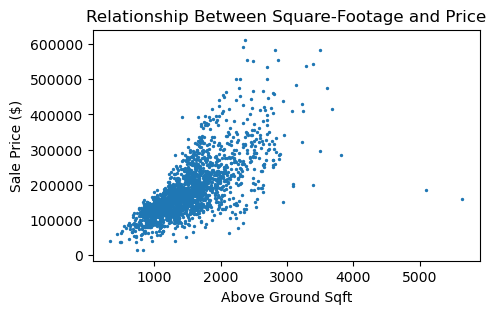

In [19]:
plt.figure(figsize=(5,3))
plt.scatter(hs['Gr Liv Area'], hs.SalePrice, s=2);
plt.ylabel("Sale Price ($)")
plt.xlabel("Above Ground Sqft")
plt.title("Relationship Between Square-Footage and Price");

In [20]:
hs[hs['Gr Liv Area'] > 4000]

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
960   1499           60        RL         313.0     63887   Pave       IR3   
1885  2181           20        RL         128.0     39290   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
960           Bnk    AllPub     Corner        Gtl      Edwards       Feedr   
1885          Bnk    AllPub     Inside        Gtl      Edwards        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
960         Norm      1Fam      2Story            10             5   
1885        Norm      1Fam      1Story            10             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
960         2008            2008        Hip   ClyTile       Stucco   
1885        2008            2009        Hip   CompShg      CemntBd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
960        Stucco        Stone         796.0         Ex         TA      PConc   
1885      CmentBd        Stone        1224.0         Ex         TA      PConc   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
960         Ex        TA            Gd            GLQ        5644.0   
1885        Ex        TA            Gd            GLQ        4010.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
960             Unf           0.0        466.0         6110.0    GasA   
1885            Unf           0.0       1085.0         5095.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
960          Ex           Y      SBrkr        4692         950   
1885         Ex           Y      SBrkr        5095           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
960                 0         5642             2.0             0.0          2   
1885                0         5095             1.0             1.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
960           1              3              1           Ex             12   
1885          1              2              1           Ex             15   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
960         Typ           3           Gd      Attchd         2008.0   
1885        Typ           2           Gd      Attchd         2008.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
960            Fin          2.0       1418.0          TA          TA   
1885           Fin          3.0       1154.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
960            Y           214            292               0           0   
1885           Y           546            484               0           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  SalePrice  
960              0        480         0        1     2008       New     160000  
1885             0          0     17000       10     2007       New     183850

##### <span style='color: blue'>These two observations are accounting for the outliers in Gr Liv Area, Total Bsmt SF, and BsmtFin SF1. We will look at the StDevs of the identified variables to see if this gives us insight into how to handle these. We will also look at Lot Area and Garage Area. </span>

In [21]:
# Look at standard deviations above/below for Gr Liv Area
x = hs['Gr Liv Area']
xbar = hs['Gr Liv Area'].mean()
s = hs['Gr Liv Area'].std()

In [22]:
z_area = (x - xbar) / s

hs['z_area'] = z_area
hs[(hs['z_area'] >= 3) | (hs['z_area'] <= -3)].sort_values(['z_area'], ascending=False)

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
960   1499           60        RL         313.0     63887   Pave       IR3   
1885  2181           20        RL         128.0     39290   Pave       IR1   
616   1498           20        RL         123.0     47007   Pave       IR1   
1897  2738           75        RL          60.0     19800   Pave       Reg   
1035  2667           75        RM          90.0     22950   Pave       IR2   
1692  2451           60        RL         114.0     17242   Pave       IR1   
1939  1307           75        RM          87.0     18386   Pave       Reg   
858   2195          190        RH          60.0     10896   Pave       Reg   
138   2331           60        RL          60.0     18062   Pave       IR1   
823     16           60        RL          47.0     53504   Pave       IR2   
1389    66           50        RL          56.0     14720   Pave       IR1   
328   1773           20        RL           NaN     12692   Pave       IR1   
1020   254           60        RL          90.0     12376   Pave       Reg   
1700   423           60        RL         104.0     13518   Pave       Reg   
1563  2046           50        RL         138.0     18030   Pave       IR1   
1433   910           75        RL         102.0     15863   Pave       Reg   
465   1765           60        RL          89.0     10557   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
960           Bnk    AllPub     Corner        Gtl      Edwards       Feedr   
1885          Bnk    AllPub     Inside        Gtl      Edwards        Norm   
616           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
1897          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
1035          Lvl    AllPub     Inside        Gtl      OldTown      Artery   
1692          Lvl    AllPub     Inside        Gtl      NoRidge        Norm   
1939          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
858           Bnk    AllPub     Inside        Gtl        SWISU       Feedr   
138           HLS    AllPub    CulDSac        Gtl      StoneBr        Norm   
823           HLS    AllPub    CulDSac        Mod      StoneBr        Norm   
1389          Lvl    AllPub    CulDSac        Gtl      NoRidge        Norm   
328           Lvl    AllPub     Inside        Gtl      NoRidge        Norm   
1020          Lvl    AllPub     Corner        Gtl      SawyerW        Norm   
1700          Lvl    AllPub     Inside        Gtl      NridgHt        Norm   
1563          Bnk    AllPub     Inside        Gtl      ClearCr        Norm   
1433          Lvl    AllPub     Corner        Gtl        SWISU        Norm   
465           Lvl    AllPub     Inside        Gtl      NoRidge        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
960         Norm      1Fam      2Story            10             5   
1885        Norm      1Fam      1Story            10             5   
616         Norm      1Fam      1Story             5             7   
1897        Norm      1Fam      2.5Unf             6             8   
1035        Norm      1Fam      2.5Fin            10             9   
1692        Norm      1Fam      2Story             9             5   
1939        Norm      1Fam      2.5Fin             7             9   
858         Norm    2fmCon      2.5Fin             6             7   
138         Norm      1Fam      2Story            10             5   
823         Norm      1Fam      2Story             8             5   
1389        Norm      1Fam      1.5Fin             8             5   
328         Norm      1Fam      1Story             8             5   
1020        Norm      1Fam      2Story             7             5   
1700        Norm      1Fam      2Story             9             5   
1563        Norm      1Fam      1.5Fin             5             6   
1433        Norm      1Fam      2.5Fin             7             3   
465     

In [23]:
# Drop the clear outliers, these appear to be atypical and will not help us accurately predict SalePrice
# Other values which are +/- 3 SDs we will keep for now, these could be explainable by other factors which our model can account for
hs = hs[hs['Gr Liv Area'] < 4000]

In [24]:
hs.shape

(2049, 77)

In [25]:
# Look at potential outliers in Lot Area
x = hs['Lot Area']
xbar = hs['Lot Area'].mean()
s = hs['Lot Area'].std()
z_lota = (x - xbar) / s

hs['z_lota'] = z_lota
hs[(hs['z_lota'] >= 3) | (hs['z_lota'] <= -3)].sort_values(['z_lota'], ascending=False)

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
471   2116           50        RL           NaN    159000   Pave       IR2   
694   2072           20        RL           NaN    115149   Pave       IR2   
1854  2767           20        RL          62.0     70761   Pave       IR1   
745    315           20        RL           NaN     57200   Pave       IR1   
823     16           60        RL          47.0     53504   Pave       IR2   
1052  1403           20        RL           NaN     53227   Pave       IR1   
1843  2117           60        RL           NaN     53107   Pave       IR2   
1964  1638           20        RL          52.0     51974   Pave       IR1   
1571  2523           20        RL          68.0     50271   Pave       IR1   
1726  2894           20        RL           NaN     50102   Pave       IR1   
1167  1016           20        RL           NaN     47280   Pave       IR1   
616   1498           20        RL         123.0     47007   Pave       IR1   
1542   505           60        RL          52.0     46589   Pave       IR2   
1875  2279           20        RL         200.0     43500   Pave       Reg   
441   1639          190        RL         195.0     41600   Pave       IR1   
108   2309           20        RL           NaN     39384   Pave       IR1   
841   1402           20        RL          73.0     39104   Pave       IR1   
24    2339          190        RL         100.0     34650   Pave       Reg   
1701  2687           50        RM          90.0     33120   Pave       IR3   
913   2230           20        RL           NaN     32668   Pave       IR1   
337   2283          190        RL           NaN     32463   Pave       Reg   
1080     1           20        RL         141.0     31770   Pave       IR1   
635   2904           20   A (agr)         125.0     31250   Pave       Reg   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
471           Low    AllPub    CulDSac        Sev      ClearCr        Norm   
694           Low    AllPub    CulDSac        Sev      ClearCr        Norm   
1854          Low    AllPub     Inside        Mod      ClearCr        Norm   
745           Bnk    AllPub     Inside        Sev       Timber        Norm   
823           HLS    AllPub    CulDSac        Mod      StoneBr        Norm   
1052          Low    AllPub    CulDSac        Mod      ClearCr        Norm   
1843          Low    AllPub     Corner        Mod      ClearCr       Feedr   
1964          Lvl    AllPub    CulDSac        Gtl      StoneBr        PosN   
1571          Low    AllPub     Inside        Gtl      Veenker        Norm   
1726          Low    AllPub     Inside        Mod       Timber        Norm   
1167          Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
616           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
1542          Lvl    AllPub    CulDSac        Gtl      NoRidge        Norm   
1875          Lvl    AllPub     Inside        Gtl      Mitchel      Artery   
441           Lvl    AllPub        FR2        Gtl      Gilbert        Norm   
108           Low    AllPub    CulDSac        Sev        NAmes        Norm   
841           Low    AllPub    CulDSac        Sev      ClearCr        Norm   
24            Bnk    AllPub     Inside        Gtl      Gilbert        Norm   
1701          Lvl    AllPub     Inside        Gtl      OldTown        RRAn   
913           Lvl    AllPub    CulDSac        Gtl      Crawfor        Norm   
337           Low    AllPub     Inside        Mod      Mitchel        Norm   
1080          Lvl    AllPub     Corner        Gtl        NAmes        Norm   
635           Lvl    AllPub     Inside        Gtl      Mitchel      Artery   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
471         Norm      1Fam      1.5Fin             6             7   
694         Norm      1Fam      1Story             7             5   
1854        Norm      1Fam      1Story             7

In [26]:
# Drop the clear outliers of Lot Area, these two data points are 22 and 16 StDevs above the mean, this appears to be atypical and will not help us accurately predict SalePrice
# Other values which are +/- 3 SDs we will keep for now, these could be explainable by other factors which our model can account for
hs = hs[hs['Lot Area'] < 100000]

In [27]:
hs.shape

(2047, 78)

In [28]:
# Look at potential outliers in Garage Area
x = hs['Garage Area']
xbar = hs['Garage Area'].mean()
s = hs['Garage Area'].std()
z_gara = (x - xbar) / s

hs['z_gara'] = z_gara
hs[(hs['z_gara'] >= 3) | (hs['z_gara'] <= -3)].sort_values(['z_gara'], ascending=False)

#These outliers don't appear to be too much beyond +/- 3 StDevs, we will leave these in

Id  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
337   2283          190        RL           NaN     32463   Pave       Reg   
1158  1426           20        RL          91.0     11778   Pave       Reg   
1293  1028           60        RL           NaN     12511   Pave       IR1   
1557   863           20        RL          90.0     11664   Pave       Reg   
682   1053           20        RL         114.0     14803   Pave       Reg   
925    747           30        RM          50.0      8635   Pave       Reg   
800   1702           20        RL          59.0     17169   Pave       IR2   
81     367           20        RL          63.0     17423   Pave       IR1   
332   1060           60        RL          96.0     12539   Pave       Reg   
1060   819           20        RL          84.0     10933   Pave       Reg   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
337           Low    AllPub     Inside        Mod      Mitchel        Norm   
1158          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   
1293          Lvl    AllPub     Corner        Gtl       NWAmes        Norm   
1557          Lvl    AllPub     Corner        Gtl      CollgCr        Norm   
682           Lvl    AllPub     Inside        Gtl      NridgHt        PosN   
925           Lvl    AllPub     Inside        Gtl      BrkSide        Norm   
800           Lvl    AllPub    CulDSac        Gtl      NridgHt        Norm   
81            Lvl    AllPub    CulDSac        Gtl      StoneBr        Norm   
332           Lvl    AllPub     Inside        Gtl      NridgHt        PosN   
1060          Lvl    AllPub     Inside        Gtl      CollgCr        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
337         Norm    2fmCon      1Story             4             4   
1158        Norm      1Fam      1Story             9             5   
1293        Norm      1Fam      2Story             7             7   
1557        Norm      1Fam      1Story             7             5   
682         PosN      1Fam      1Story            10             5   
925         Norm      1Fam      1Story             5             5   
800         Norm      1Fam      1Story            10             5   
81          Norm      1Fam      1Story             9             5   
332         Norm      1Fam      2Story            10             5   
1060        Norm      1Fam      1Story             9             5   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
337         1961            1975      Gable   CompShg      MetalSd   
1158        2008            2008        Hip   CompShg      VinylSd   
1293        1978            1978    Mansard   WdShake      Plywood   
1557        2002            2002        Hip   CompShg      VinylSd   
682         2007            2008        Hip   CompShg      CemntBd   
925         1925            1950        Hip   CompShg      Wd Sdng   
800         2007            2007        Hip   CompShg      CemntBd   
81          2008            2009        Hip   CompShg      VinylSd   
332         2005            2006        Hip   CompShg      CemntBd   
1060        2009            2009        Hip   CompShg      VinylSd   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
337       MetalSd        Stone         149.0         TA         Gd     CBlock   
1158      VinylSd        Stone         554.0         Gd         TA      PConc   
1293      Plywood      BrkFace         168.0         Gd         TA      PConc   
1557      VinylSd         None           0.0         Gd         TA      PConc   
682       CmentBd      BrkFace         816.0         Ex         TA      PConc   
925       Wd Sdng         None           0.0         TA         Fa     BrkTil   
800       CmentBd      BrkFace         970.0         Ex         TA      PConc   
81        VinylSd        Stone         748.0         Ex         TA      PConc   
332       CmentBd  

##### <span style='color: blue'>Were dropped clear outliers based on Gr Liv Are and Lot Area, otherwise we left observations in even if they were +/- 3 StDevs from the mean. We may change this later.</span>

##### <span style='color: blue'>Next, we will fill in missings. Since there are few missings overall, the logic is as follows: 
- <span style='color: blue'>If a feature exists (such as basement, garage, or veneer), but a component of it is missing:
    - <span style='color: blue'>Fill in with mean of the column (if continuous)
    - <span style='color: blue'>Fill in with mode of the column (if discrete or categorical)    
- <span style='color: blue'>If the feature does not exist:
    - <span style='color: blue'>Fill in the feature component with 0 (if numeric)
    - <span style='color: blue'>Fill in the feature component with NA (if categorical) </span>
    
<span style='color: blue'> Other options explored included imputing missing values based on certain groupby features, such as imputing missing Garage values by taking the mean of the appropriate Garage Type (rather than the mean across all Garage Types), but because missing values are few in this data, and groupby did not yield much more predictive power, a simpler approach is being used. </span>

#### Imputing Data for Missing Values

In [29]:
# If a feature exists (e.g., a fireplace, a basement, a garage), and has a missing value, fill in missing value with the average (is continuous) or with the mode of observations (if discrete or categorical)
# If a feature does not exist, put 0 for continuous and NA for categorical vars
hs['Total Bsmt SF'] = hs['Total Bsmt SF'].fillna(0)

hs['BsmtFin SF 1'] = np.where(hs['Total Bsmt SF'] > 0, hs['BsmtFin SF 1'].fillna(hs['BsmtFin SF 1'].mean()), 0)
hs['BsmtFin SF 2'] = np.where(hs['Total Bsmt SF'] > 0, hs['BsmtFin SF 2'].fillna(hs['BsmtFin SF 2'].mean()), 0)
hs['Bsmt Unf SF'] = np.where(hs['Total Bsmt SF'] > 0, hs['Bsmt Unf SF'].fillna(hs['BsmtFin SF 2'].mean()), 0)


hs['Bsmt Cond'] = np.where(hs['Total Bsmt SF'] > 0, hs['Bsmt Cond'].fillna(hs['Bsmt Cond'].value_counts().idxmax()), "NA") #source for idxmax: https://www.statology.org/idxmax-pandas/
hs['BsmtFin Type 1'] = np.where(hs['Total Bsmt SF'] > 0, hs['BsmtFin Type 1'].fillna(hs['BsmtFin Type 1'].value_counts().idxmax()), "NA")
hs['BsmtFin Type 2'] = np.where(hs['Total Bsmt SF'] > 0, hs['BsmtFin Type 2'].fillna(hs['BsmtFin Type 2'].value_counts().idxmax()), "NA")
hs['Bsmt Qual'] = np.where(hs['Total Bsmt SF'] > 0, hs['Bsmt Qual'].fillna(hs['Bsmt Qual'].value_counts().idxmax()), "NA")
hs['Bsmt Exposure'] = np.where(hs['Total Bsmt SF'] > 0, hs['Bsmt Exposure'].fillna(hs['Bsmt Exposure'].value_counts().idxmax()), "NA")
hs['Bsmt Full Bath'] = np.where(hs['Total Bsmt SF'] > 0, hs['Bsmt Full Bath'].fillna(hs['Bsmt Full Bath'].value_counts().idxmax()), "NA")
hs['Bsmt Half Bath'] = np.where(hs['Total Bsmt SF'] > 0, hs['Bsmt Half Bath'].fillna(hs['Bsmt Half Bath'].value_counts().idxmax()), "NA")

In [30]:
hs['Garage Yr Blt'] = hs['Garage Yr Blt'].fillna("NA")
hs['Garage Area'] = np.where(hs['Garage Type'] != "NA", hs['Garage Area'].fillna(hs['Garage Area'].mean()), 0)

hs['Garage Qual'] = np.where(hs['Garage Type'] != "NA", hs['Garage Qual'].fillna(hs['Garage Qual'].value_counts().idxmax()), "NA")
hs['Garage Cars'] = np.where(hs['Garage Type'] != "NA", hs['Garage Cars'].fillna(hs['Garage Cars'].value_counts().idxmax()), "NA")
hs['Garage Finish'] = np.where(hs['Garage Type'] != "NA", hs['Garage Finish'].fillna(hs['Garage Finish'].value_counts().idxmax()), "NA")
hs['Garage Cond'] = np.where(hs['Garage Type'] != "NA", hs['Garage Cond'].fillna(hs['Garage Cond'].value_counts().idxmax()), "NA")

In [31]:
hs['Mas Vnr Area'] = hs['Mas Vnr Area'].fillna(hs['Mas Vnr Area'].mean())

In [32]:
hs['Lot Frontage'] = hs['Lot Frontage'].fillna(hs['Lot Frontage'].mean())

In [33]:
hs['Mas Vnr Type'] = np.where(hs['Mas Vnr Area'] > 0, hs['Mas Vnr Type'].fillna(hs['Mas Vnr Type'].value_counts().idxmax()), "NA")

In [34]:
# REPEATING FOR TEST.CSV -- We will make sure to use the means and modes from the training set, Notice that all fillna portions reference the training set (hs) but prior to that hs_test is referenced
hs_test['Total Bsmt SF'] = hs_test['Total Bsmt SF'].fillna(0)

hs_test['BsmtFin SF 1'] = np.where(hs_test['Total Bsmt SF'] > 0, hs_test['BsmtFin SF 1'].fillna(hs['BsmtFin SF 1'].mean()), 0)
hs_test['BsmtFin SF 2'] = np.where(hs_test['Total Bsmt SF'] > 0, hs_test['BsmtFin SF 2'].fillna(hs['BsmtFin SF 2'].mean()), 0)
hs_test['Bsmt Unf SF'] = np.where(hs_test['Total Bsmt SF'] > 0, hs_test['Bsmt Unf SF'].fillna(hs['BsmtFin SF 2'].mean()), 0)


hs_test['Bsmt Cond'] = np.where(hs_test['Total Bsmt SF'] > 0, hs_test['Bsmt Cond'].fillna(hs['Bsmt Cond'].value_counts().idxmax()), "NA")
hs_test['BsmtFin Type 1'] = np.where(hs_test['Total Bsmt SF'] > 0, hs_test['BsmtFin Type 1'].fillna(hs['BsmtFin Type 1'].value_counts().idxmax()), "NA")
hs_test['BsmtFin Type 2'] = np.where(hs_test['Total Bsmt SF'] > 0, hs_test['BsmtFin Type 2'].fillna(hs['BsmtFin Type 2'].value_counts().idxmax()), "NA")
hs_test['Bsmt Qual'] = np.where(hs_test['Total Bsmt SF'] > 0, hs_test['Bsmt Qual'].fillna(hs['Bsmt Qual'].value_counts().idxmax()), "NA")
hs_test['Bsmt Exposure'] = np.where(hs_test['Total Bsmt SF'] > 0, hs_test['Bsmt Exposure'].fillna(hs['Bsmt Exposure'].value_counts().idxmax()), "NA")
hs_test['Bsmt Full Bath'] = np.where(hs_test['Total Bsmt SF'] > 0, hs_test['Bsmt Full Bath'].fillna(hs['Bsmt Full Bath'].value_counts().idxmax()), "NA")
hs_test['Bsmt Half Bath'] = np.where(hs_test['Total Bsmt SF'] > 0, hs_test['Bsmt Half Bath'].fillna(hs['Bsmt Half Bath'].value_counts().idxmax()), "NA")


hs_test['Garage Yr Blt'] = hs_test['Garage Yr Blt'].fillna("NA")
hs_test['Garage Area'] = np.where(hs_test['Garage Type'] != "NA", hs_test['Garage Area'].fillna(hs['Garage Area'].mean()), 0)

hs_test['Garage Qual'] = np.where(hs_test['Garage Type'] != "NA", hs_test['Garage Qual'].fillna(hs['Garage Qual'].value_counts().idxmax()), "NA")
hs_test['Garage Cars'] = np.where(hs_test['Garage Type'] != "NA", hs_test['Garage Cars'].fillna(hs['Garage Cars'].value_counts().idxmax()), "NA")
hs_test['Garage Finish'] = np.where(hs_test['Garage Type'] != "NA", hs_test['Garage Finish'].fillna(hs['Garage Finish'].value_counts().idxmax()), "NA")
hs_test['Garage Cond'] = np.where(hs_test['Garage Type'] != "NA", hs_test['Garage Cond'].fillna(hs['Garage Cond'].value_counts().idxmax()), "NA")


hs_test['Mas Vnr Area'] = hs_test['Mas Vnr Area'].fillna(hs['Mas Vnr Area'].mean())
hs_test['Lot Frontage'] = hs_test['Lot Frontage'].fillna(hs['Lot Frontage'].mean())
hs_test['Mas Vnr Type'] = np.where(hs_test['Mas Vnr Area'] > 0, hs_test['Mas Vnr Type'].fillna(hs['Mas Vnr Type'].value_counts().idxmax()), "NA")

In [35]:
hs.isnull().sum()

Id                 0
MS SubClass        0
MS Zoning          0
Lot Frontage       0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Mas Vnr Type       0
Mas Vnr Area       0
Exter Qual         0
Exter Cond         0
Foundation         0
Bsmt Qual          0
Bsmt Cond          0
Bsmt Exposure      0
BsmtFin Type 1     0
BsmtFin SF 1       0
BsmtFin Type 2     0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bat

In [36]:
hs.shape

(2047, 79)

---
### II. Exploratory Data Analysis and Visualization

##### Additional cleaning included, based on exploration
---


#### What are the Descriptive Statistics of the Initial Features Identified?

In [37]:
hs[feats_initial].isnull().sum()

Overall Qual      0
Year Built        0
Year Remod/Add    0
BsmtFin SF 1      0
Total Bsmt SF     0
Gr Liv Area       0
Full Bath         0
Fireplaces        0
Garage Area       0
dtype: int64

In [38]:
feats_initial = ['Overall Qual', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 'Fireplaces', 'Garage Area']
hs[feats_initial].describe()

Overall Qual   Year Built  Year Remod/Add  BsmtFin SF 1  Total Bsmt SF  \
count   2047.000000  2047.000000     2047.000000   2047.000000    2047.000000   
mean       6.107963  1971.680508     1984.147044    437.296532    1052.556424   
std        1.422336    30.184518       21.033822    439.680927     426.735948   
min        1.000000  1872.000000     1950.000000      0.000000       0.000000   
25%        5.000000  1953.000000     1964.000000      0.000000     793.000000   
50%        6.000000  1974.000000     1993.000000    368.000000     994.000000   
75%        7.000000  2001.000000     2004.000000    732.500000    1315.000000   
max       10.000000  2010.000000     2010.000000   2188.000000    3206.000000   

       Gr Liv Area    Full Bath   Fireplaces  Garage Area  
count  2047.000000  2047.000000  2047.000000  2047.000000  
mean   1495.076209     1.576453     0.587689   472.789345  
std     485.754975     0.549498     0.634619   214.465240  
min     334.000000     0.000000     0.000000     0.000000  
25%    1128.000000     1.000000     0.000000   319.000000  
50%    1442.000000     2.000000     1.000000   480.000000  
75%    1728.000000     2.000000     1.000000   576.000000  
max    3820.000000     4.000000     4.000000  1356.000000

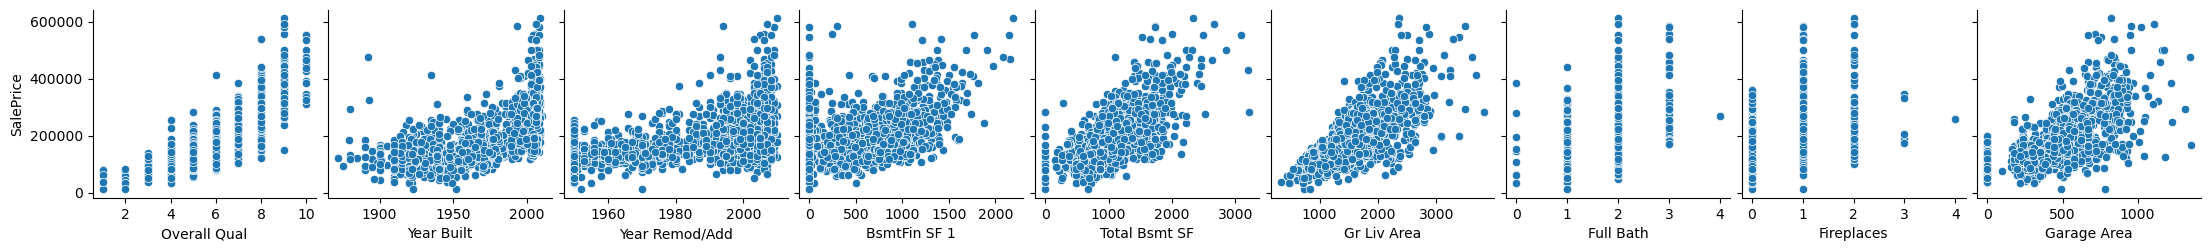

In [39]:
# Re-Doing Pair Plot and Correlation Matrix
sns.pairplot(hs, x_vars= feats_initial, y_vars = ['SalePrice']);

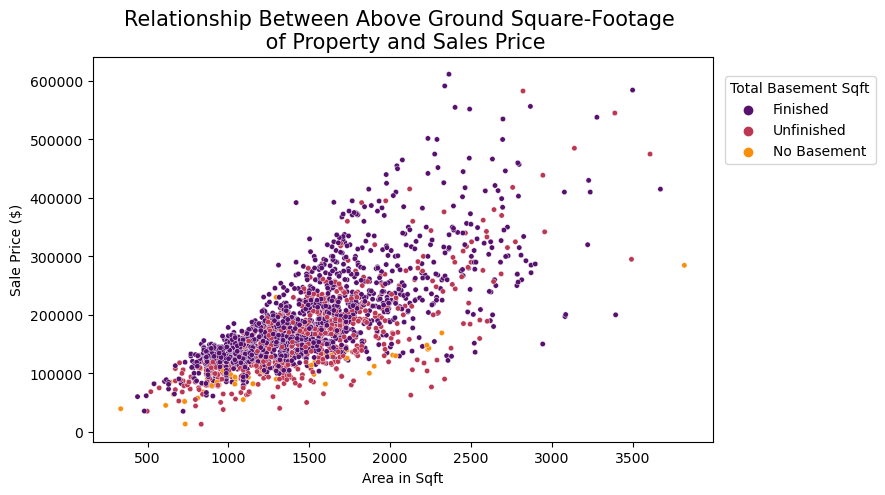

In [40]:
bsmt_cat = {
    'GLQ': 'Finished',    #Good Living Quarters
    'ALQ': 'Finished',    #Average Living Quarters
    'BLQ': 'Finished',    #Below Average Living Quarters
    'Rec': 'Finished',    #Average Rec Room
    'LwQ': 'Finished',    #Low Quality
    'Unf': 'Unfinished',  #Unfinished
    'NA': 'No Basement'   #No basedment
}

hs['bsmt_fin_cat'] = hs['BsmtFin Type 1'].map(bsmt_cat)

plt.figure(figsize = (8, 5))
sns.scatterplot(x = hs['Gr Liv Area'], y = hs['SalePrice'], hue = hs['bsmt_fin_cat'], palette = 'inferno', s=15)
plt.title('Relationship Between Above Ground Square-Footage \n of Property and Sales Price', fontsize = 15)
plt.xlabel('Area in Sqft')
plt.ylabel('Sale Price ($)')
plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'Total Basement Sqft' ); 

# Save the figure
plt.savefig('../images/sqft_area.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\farah\AppData\Local\Temp\ipykernel_60652\1789183579.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = hs['Total Bsmt SF'], y = hs['SalePrice'], palette = 'inferno', s=15)


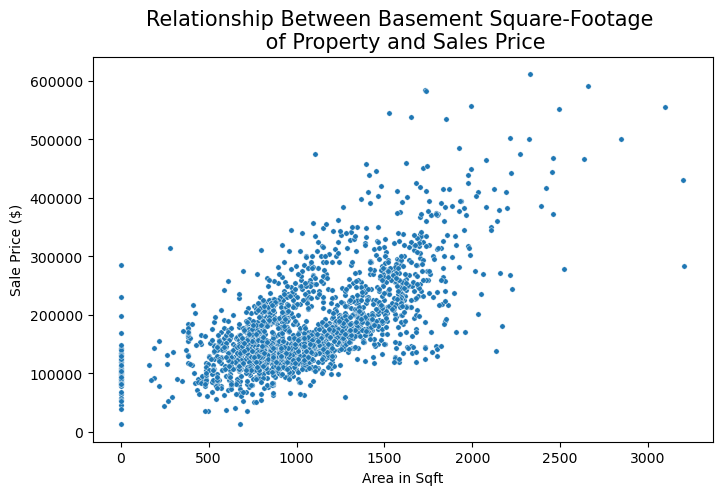

In [41]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = hs['Total Bsmt SF'], y = hs['SalePrice'], palette = 'inferno', s=15)
plt.title('Relationship Between Basement Square-Footage \n of Property and Sales Price', fontsize = 15)
plt.xlabel('Area in Sqft')
plt.ylabel('Sale Price ($)')
#plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'Above Ground SF' ); 

plt.savefig('../images/basement_area.png', dpi=192, bbox_inches='tight')

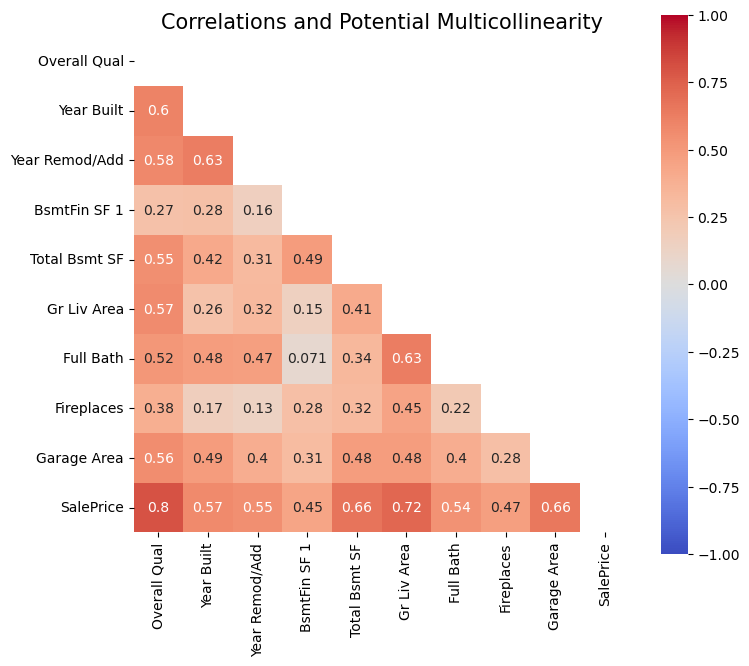

In [42]:
# See another correlation matrix on just the initial features, look more closely for multicollinearity among them
plt.figure(figsize = (8,7))
corr = hs[['Overall Qual', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 'Fireplaces', 'Garage Area', 'SalePrice']].corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            mask = mask, 
            square = True, 
            cmap = 'coolwarm', 
            annot = True, 
            vmin = -1, 
            vmax = 1)

plt.title("Correlations and Potential Multicollinearity", fontsize =15);

<span style='color: blue'>**Overall quality appears to be correlated with many other features (up to R = 0.58), Gr Liv Area is also correlated with # of Full Baths. This should be okay for now, number of baths may contain additional explanatory power vs. just sq-footage, as should the features that correlate with overall quality. Total basement square-footage (Total Bsmt SF) is collinear with the square-footage of the finished area of the basement (BsmtFin SF 1), so the latter will likely be taken out of our model, ultimately.**</span>

---

#### Which Zoning Areas Have the Highest Value Homes and Are All Zones Relevant to Analysis?

In [43]:
hs['MS Zoning'].value_counts()

RL         1594
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

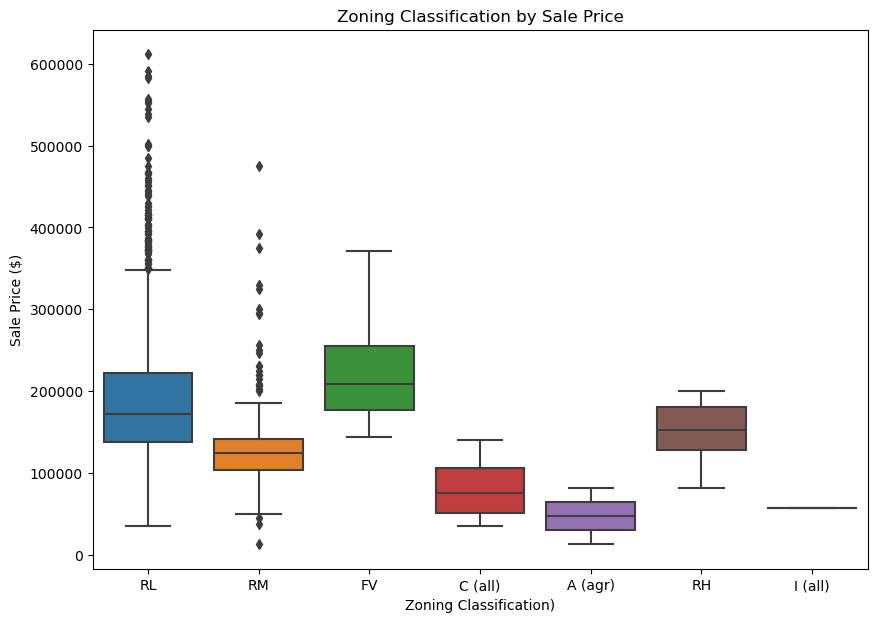

In [44]:
plt.figure(figsize = (10,7))
sns.boxplot(x=hs['MS Zoning'], y= hs['SalePrice'])

plt.title("Zoning Classification by Sale Price")
plt.xlabel('Zoning Classification)')
plt.ylabel('Sale Price ($)');

<span style='color: blue'>**Residential (Low, Medium, and High Density), as well as Floating Village locations had the highest SalePrices. Agriculture, Commercial, and Industrial zones did not have many houses, and may not be useful to this analysis which is looking to predict prices of residences in mainly residential areas.**</span>

In [45]:
# Drop Non-Residential Rows, these will probably not be of interest to our target audience
hs = hs.drop(hs[(hs['MS Zoning'] == 'C (all)') |
           (hs['MS Zoning'] == 'I (all)') |
           (hs['MS Zoning'] == 'A (agr)')].index)

hs['MS Zoning'].value_counts()

RL    1594
RM     316
FV     101
RH      14
Name: MS Zoning, dtype: int64

---
#### What is the Median Home Price By Year Sold? Are There Notable Patterns (E.g., Price Drops in 2008-2010 During Economic Recession)?

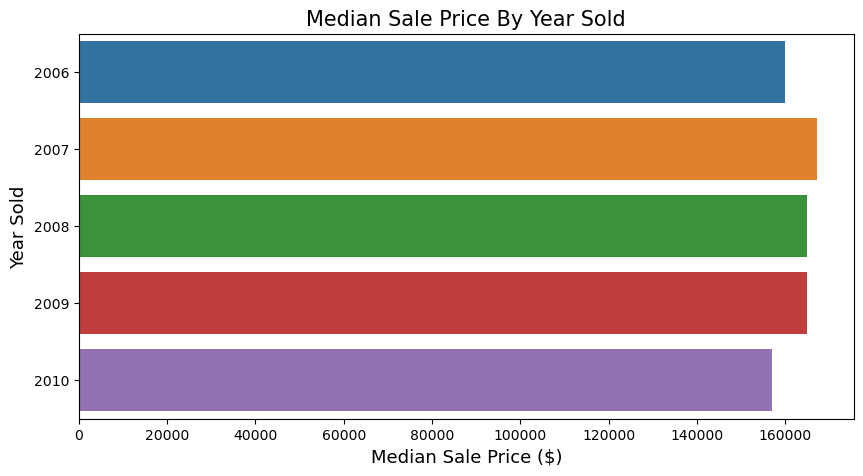

In [46]:
#yr_price = hs.groupby('Year Built').agg({'SalePrice': 'mean'}).reset_index().sort_values(by='SalePrice', ascending=False)
yr_price = hs.groupby('Yr Sold')['SalePrice'].median().reset_index()
plt.figure(figsize = (10,5))
sns.barplot(x=yr_price['SalePrice'], y=yr_price['Yr Sold'], orient = 'h', order=yr_price['Yr Sold'])

plt.title('Median Sale Price By Year Sold', fontsize=15)

plt.xlabel('Median Sale Price ($)', fontsize=13)
plt.ylabel('Year Sold', fontsize=13);

<span style='color: blue'>**Median Sale Prices are fairly constant from 2006-2010, 2010 slightly decreased and was lower than the previous 4 years.**</span>

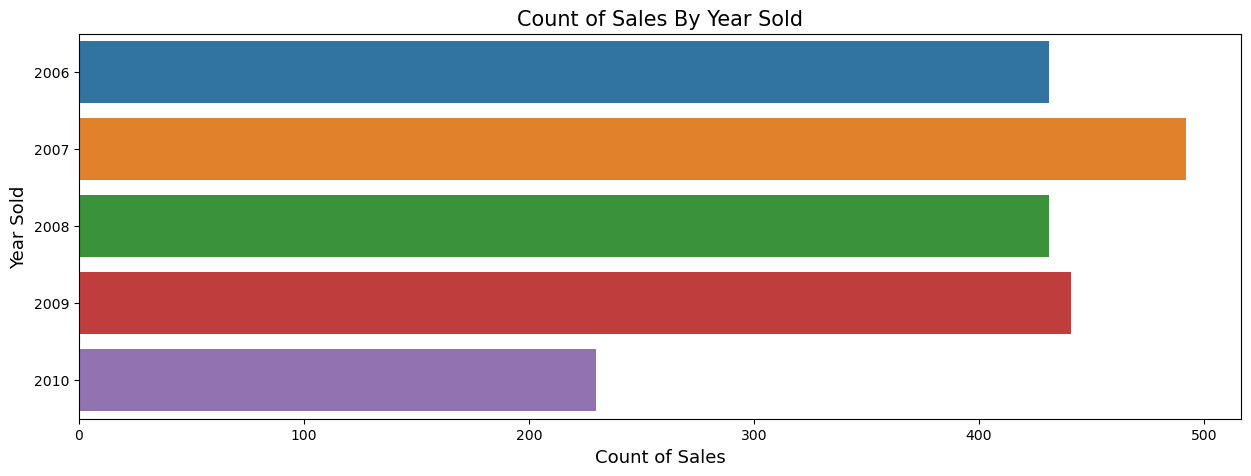

In [47]:
yr_count = hs.groupby('Yr Sold')['SalePrice'].count().reset_index()
plt.figure(figsize = (15,5))
sns.barplot(x=yr_count['SalePrice'], y=yr_count['Yr Sold'], orient = 'h', order=yr_count['Yr Sold'])

plt.title('Count of Sales By Year Sold', fontsize=15)

plt.xlabel('Count of Sales', fontsize=13)
plt.ylabel('Year Sold', fontsize=13);

<span style='color: blue'>**The number of homes sold in Ames, IO decreased substantially in 2010, and was highest in 2007. It is possible that the pattern seen could have been due to the economic climate, but the median prices (above) do not help give anymore insight into this.**</span>

---
#### What is the Relationship Between Lot Configuration and Sale Price?

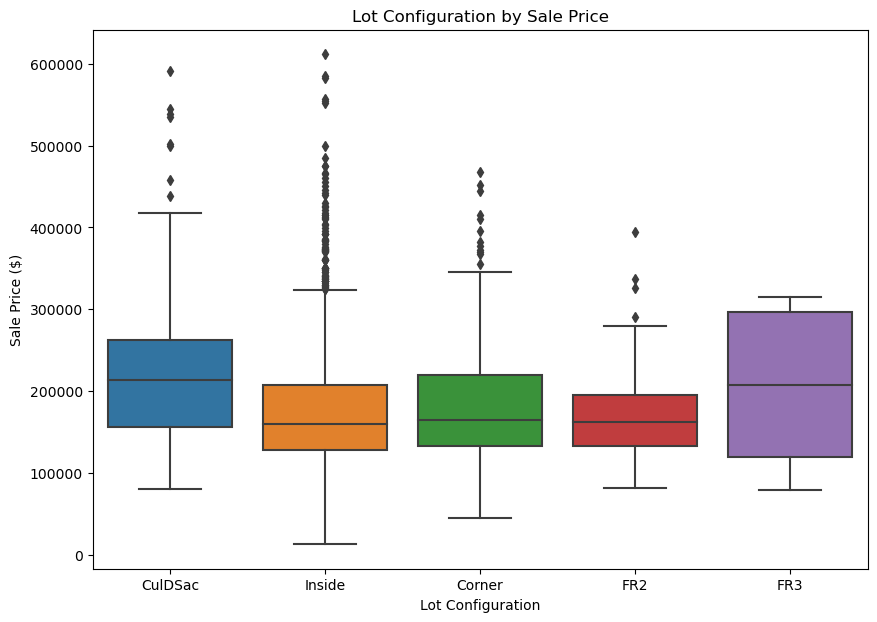

In [48]:
plt.figure(figsize = (10,7))
sns.boxplot(x=hs['Lot Config'], y= hs['SalePrice'])

plt.title("Lot Configuration by Sale Price")
plt.xlabel('Lot Configuration')
plt.ylabel('Sale Price ($)');

plt.savefig('../images/lotconfig.png', dpi=300, bbox_inches='tight')

<span style='color: blue'>**Frontage on three sides of the property (FR3) has the largest interquartile range of Sale Price, but among the smaller spreads otherwise. A cul-de-sac configuration and FR3 have the highest median Sale Price, and there are many outliers indicating that Inside Lots may also sell for higher prices.**</span>

---
#### What Does it Look Like When We Compare Neighborhood to Sale Price, Overall Quality and Condition, or Against Desirable Location Features (Proximity to Various Conditions)

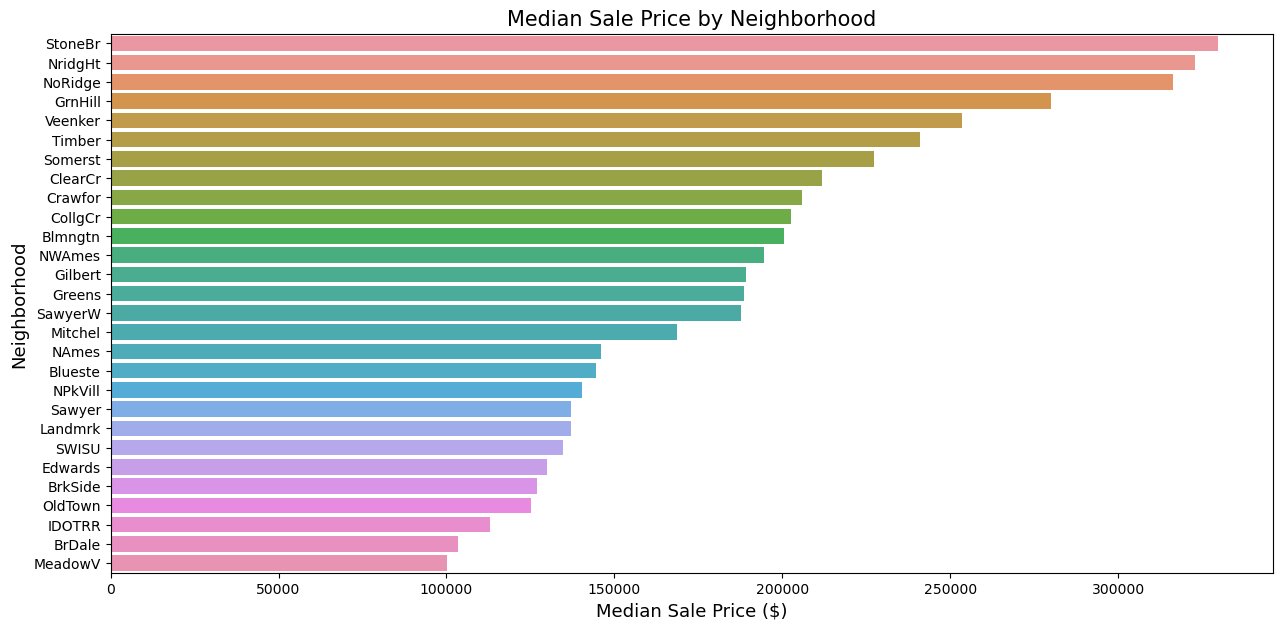

In [49]:
neighbor_med = hs.groupby('Neighborhood')['SalePrice'].mean().reset_index().sort_values(by="SalePrice", ascending=False)
plt.figure(figsize = (15,7))
sns.barplot(x=neighbor_med['SalePrice'], y=neighbor_med['Neighborhood'], orient = 'h', order=neighbor_med['Neighborhood'])

plt.title('Median Sale Price by Neighborhood', fontsize=15)

plt.xlabel('Median Sale Price ($)', fontsize=13)
plt.ylabel('Neighborhood', fontsize=13);

<span style= 'color: blue'>**There was a large spread in median property sale prices between the 28 neighborhoods in Ames, IO. The neighborhoods with the highest sales prices may be assumed to be among the most desirable locations.** </span>

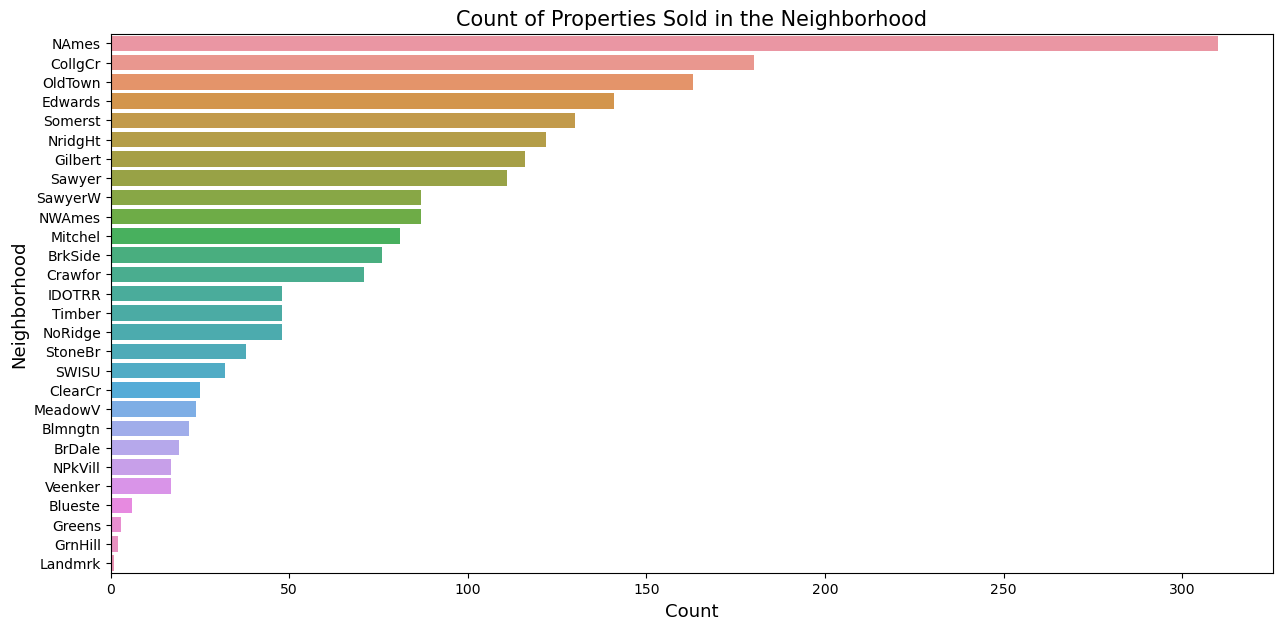

In [50]:
neighbor_count = hs.groupby('Neighborhood')['SalePrice'].count().reset_index().sort_values(by="SalePrice", ascending=False)
plt.figure(figsize = (15,7))
sns.barplot(x=neighbor_count['SalePrice'], y=neighbor_count['Neighborhood'], orient = 'h', order=neighbor_count['Neighborhood'])

plt.title('Count of Properties Sold in the Neighborhood', fontsize=15)

plt.xlabel('Count', fontsize=13)
plt.ylabel('Neighborhood', fontsize=13);

<span style= 'color: blue'>**There was a large spread in count of homes sold per neighborhood between the 28 neighborhoods in Ames, IO. North Ames had the highest number of sales, but not the highest median sale prices. Northridge Heights had a fairly high number of properties sold (ranked 6th), as well as high median sale price (ranked 2nd).** </span>

In [51]:
hs['Overall_Qual_Cond'] = hs['Overall Qual']*hs['Overall Cond']

qual_cond = {
    1: "Below Avg to Poor",
    2: "Below Avg to Poor",
    3: "Below Avg to Poor",
    4: "Below Avg to Poor",
    5: "Avg to Above Avg",
    6: "Avg to Above Avg",
    7: "Good to Excellent+",
    8: "Good to Excellent+",
    9: "Good to Excellent+",
    10: "Good to Excellent+"
}

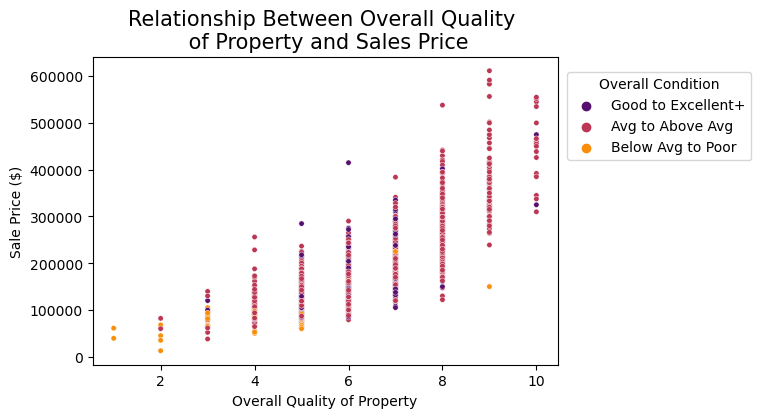

In [52]:
plt.figure(figsize = (6, 4))

cond_descrip = hs['Overall Cond'].map(qual_cond)
sns.scatterplot(x = hs['Overall Qual'], y = hs['SalePrice'], hue = cond_descrip, palette = 'inferno', s=15)

# Create a descriptive title
plt.title('Relationship Between Overall Quality \n of Property and Sales Price', fontsize = 15)

# Add axis labels
plt.xlabel('Overall Quality of Property')
plt.ylabel('Sale Price ($)')

plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'Overall Condition' ); 
#code adapted from https://www.statology.org/seaborn-legend-outside/

plt.savefig('../images/overall_quality.png', dpi=300, bbox_inches='tight')

<span style= 'color: blue'>**Overall Quality of the property appears to be a strong predictor of Sale Price. The Overall Condition of those properties only needed to be average to above average in order to be associated with high sale price.** </span>

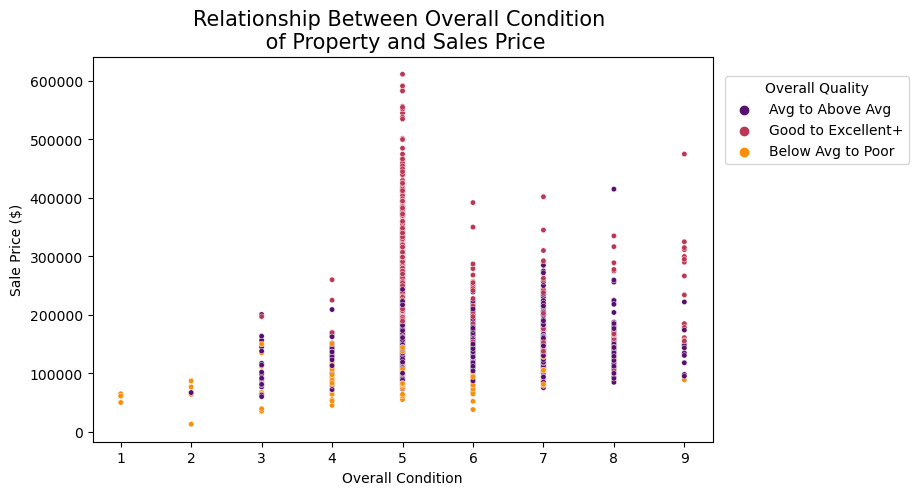

In [53]:
plt.figure(figsize = (8, 5))

qual_descrip = hs['Overall Qual'].map(qual_cond)
sns.scatterplot(x = hs['Overall Cond'], y = hs['SalePrice'], hue = qual_descrip, palette = 'inferno', s=15)

# Create a descriptive title
plt.title('Relationship Between Overall Condition \n of Property and Sales Price', fontsize = 15)

# Add axis labels
plt.xlabel('Overall Condition')
plt.ylabel('Sale Price ($)')

plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'Overall Quality' ); 

<span style= 'color: blue'>**Overall Condition of the property did not have a strong positive correlation with Sale Price. The highest property sales were Good to Excellent+ quality, even if their overall condition was average.**</span>

C:\Users\farah\AppData\Local\Temp\ipykernel_60652\3635361249.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = hs['Overall_Qual_Cond'], y = hs['SalePrice'], palette = 'inferno', s=15)


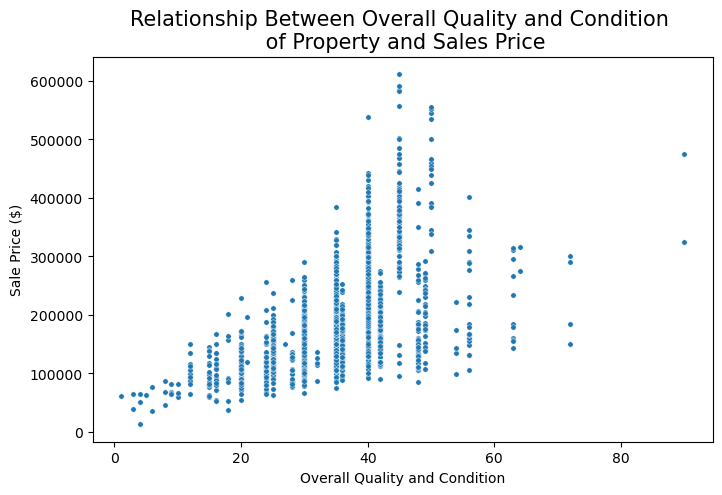

In [54]:
plt.figure(figsize = (8, 5))

sns.scatterplot(x = hs['Overall_Qual_Cond'], y = hs['SalePrice'], palette = 'inferno', s=15)

# Create a descriptive title
plt.title('Relationship Between Overall Quality and Condition \n of Property and Sales Price', fontsize = 15)

# Add axis labels
plt.xlabel('Overall Quality and Condition')
plt.ylabel('Sale Price ($)');

<span style= 'color: blue'>**Using an interactive effect between Overall Quality and Overall Condition, there appeared to be a positive correlation with Sale Price. The relationship was not as strong as Overall Quality, therefore we may focus on Overall Quality (the overall material and finish of the house) rather than Overall Condition (the overall house condition) in our analysis.**</span>

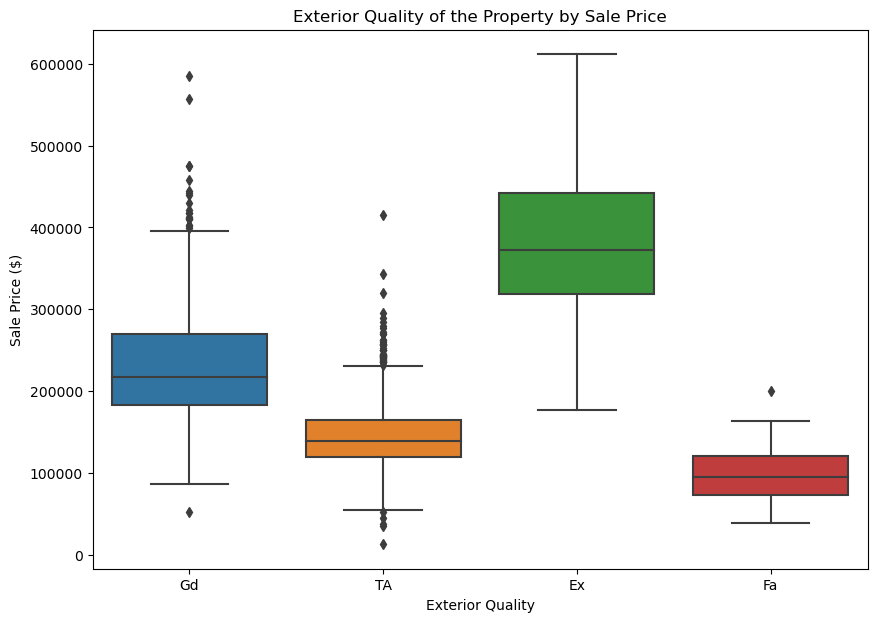

In [55]:
plt.figure(figsize = (10,7))
sns.boxplot(x=hs['Exter Qual'], y= hs['SalePrice'])

plt.title("Exterior Quality of the Property by Sale Price")
plt.xlabel('Exterior Quality')
plt.ylabel('Sale Price ($)');

plt.savefig('../images/ext_quality.png', dpi=300, bbox_inches='tight')

<span style= 'color: blue'>**Excellent Exterior Quality had higher Sale Price values than the other quality indicators. Good quality was also relatively higher than Typical or Fair rated properties. Exterior Quality looks like it may be a strong predictor of Sale Price, as the lowest quality had the least sales prices and the highest quality had the highest sales prices.**</span>

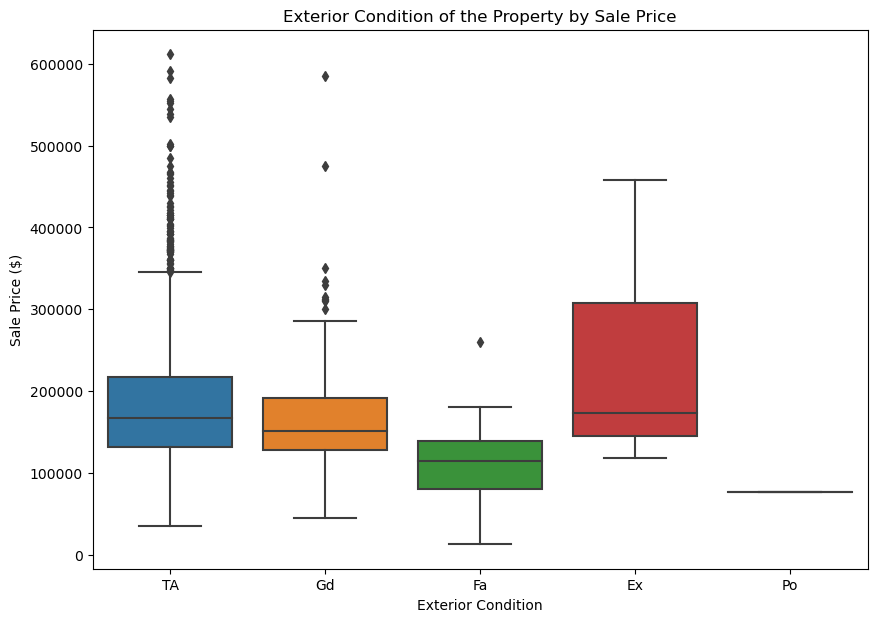

In [56]:
plt.figure(figsize = (10,7))
sns.boxplot(x=hs['Exter Cond'], y= hs['SalePrice'])

plt.title("Exterior Condition of the Property by Sale Price")
plt.xlabel('Exterior Condition')
plt.ylabel('Sale Price ($)');

<span style= 'color: blue'>**Excellent Exterior Condition of the property was more associated with higher Sale Price than the other conditions, though there were many observations of high sales prices when the exterior condition was only Typical.**</span>

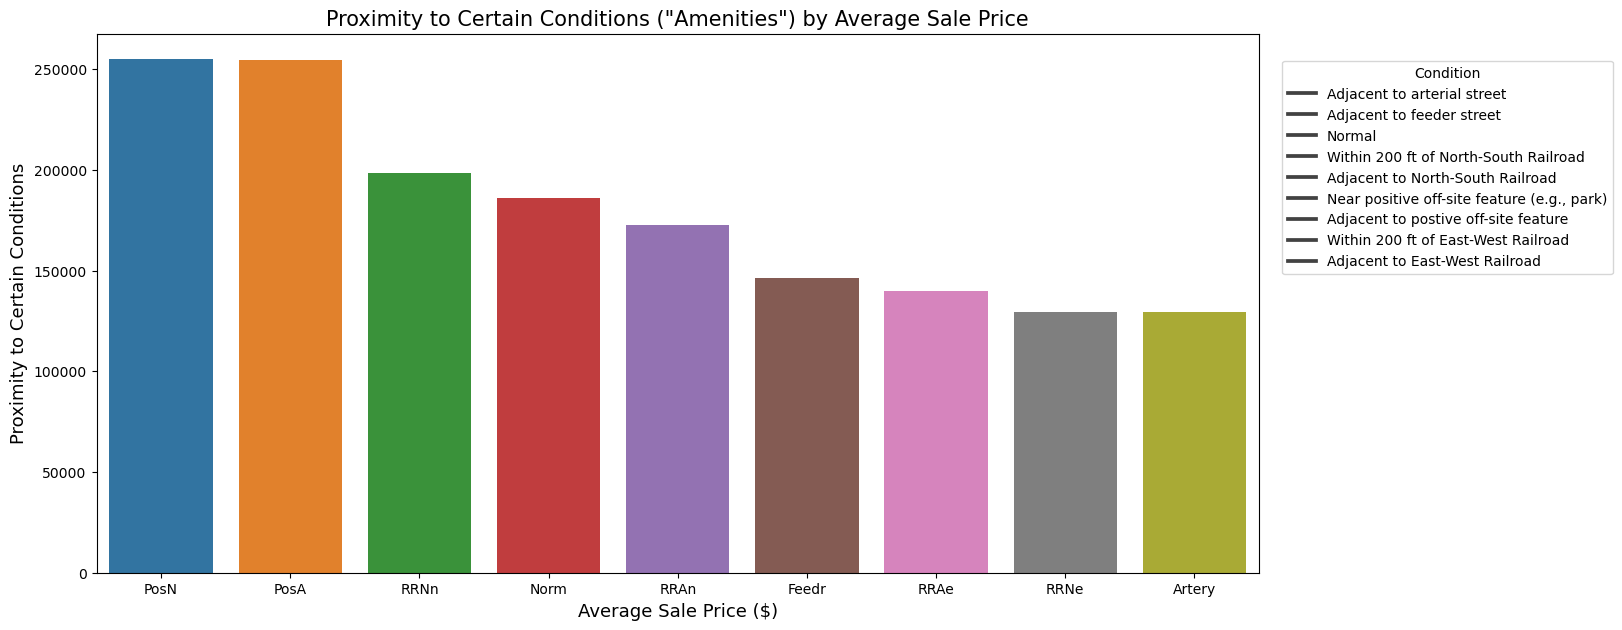

In [57]:
cond_label = {
    'Artery': 'Adjacent to arterial street',
    'Feedr': 'Adjacent to feeder street',       
    'Norm': 'Normal',  
    'RRNn': 'Within 200 ft of North-South Railroad',
    'RRAn': 'Adjacent to North-South Railroad',
    'PosN': 'Near positive off-site feature (e.g., park)',
    'PosA': 'Adjacent to postive off-site feature',
    'RRNe': 'Within 200 ft of East-West Railroad',
    'RRAe': 'Adjacent to East-West Railroad'

}

legend = hs['Condition 1'].map(cond_label)
codition_avg = hs.groupby('Condition 1')['SalePrice'].mean().reset_index().sort_values(by="SalePrice", ascending=False)
plt.figure(figsize = (15,7))
sns.barplot(x=codition_avg['Condition 1'], y=codition_avg['SalePrice'],  order=codition_avg['Condition 1'])

plt.title('Proximity to Certain Conditions ("Amenities") by Average Sale Price', fontsize=15)

plt.xlabel('Average Sale Price ($)', fontsize=13)
plt.ylabel('Proximity to Certain Conditions', fontsize=13);

plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, labels=cond_label.values(), title = 'Condition' ); 

plt.savefig('../images/proximity_to_conditions.png', dpi=300, bbox_inches='tight')

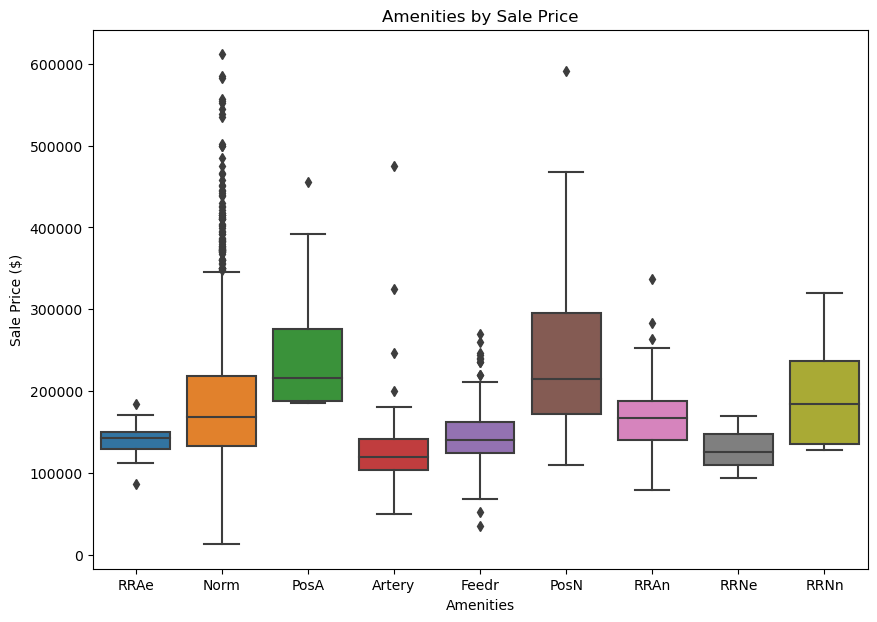

In [58]:
plt.figure(figsize = (10,7))
sns.boxplot(x=hs['Condition 1'], y= hs['SalePrice'])

plt.title("Amenities by Sale Price")
plt.xlabel('Amenities')
plt.ylabel('Sale Price ($)');

plt.savefig('../images/proximity_to_conditions2.png', dpi=300, bbox_inches='tight')

<span style='color: blue'>**Access to certain amenities, such as feeder or arterial roads, railroads, or positve offsite features (parks, greenbelt, etc.) had various relationships with Sale Price. The predictors with the highest medians sales prices and spreads were near or adjacent to offsite features and "normal" accessibility/proximity to various conditions.** </span>

---
#### Are Newer Houses Selling for Higher? What Does it Look Like When We Compare Newer Houses to Remodeled Ones?

In [59]:
# Add some variables to data frame
hs['age'] = hs['Yr Sold'] - hs['Year Built']
hs['age_adj'] = hs['Yr Sold'] - hs['Year Remod/Add']

hs['was_remod'] = np.where(hs['Year Built'] == hs['Year Remod/Add'], 0, 1)

# Correct one value that appears to be a mistake --> Year Built > Year Remod
if len(hs[hs['Year Built'] > hs['Year Remod/Add']]) > 0:
    switch1_to_2 = hs[hs['Year Built'] > hs['Year Remod/Add']].loc[:,'Year Built'].values[0]
    switch2_to_1 = hs[hs['Year Built'] > hs['Year Remod/Add']].loc[:,'Year Remod/Add'].values[0]

hs['Year Built'] = np.where(hs['Year Built'] > hs['Year Remod/Add'], switch2_to_1, hs['Year Built'])
hs['Year Remod/Add'] = np.where(hs['Year Built'] > hs['Year Remod/Add'], switch1_to_2, hs['Year Remod/Add'])



#SAME FOR TEST.CSV
# Correct one value that appears to be a mistake --> Year Built > Year Remod
# do not know if such cases exist, so will put this in an if statement

if len(hs_test[hs_test['Year Built'] > hs_test['Year Remod/Add']]) > 0:
    switch1_to_2 = hs_test[hs_test['Year Built'] > hs_test['Year Remod/Add']].loc[:,'Year Built'].values[0]
    switch2_to_1 = hs_test[hs_test['Year Built'] > hs_test['Year Remod/Add']].loc[:,'Year Remod/Add'].values[0]

    hs_test['Year Built'] = np.where(hs_test['Year Built'] > hs_test['Year Remod/Add'], switch2_to_1, hs['Year Built'])
    hs_test['Year Remod/Add'] = np.where(hs_test['Year Built'] > hs_test['Year Remod/Add'], switch1_to_2, hs['Year Remod/Add'])

hs_test['age'] = hs_test['Yr Sold'] - hs_test['Year Built']
hs_test['age_adj'] = hs_test['Yr Sold'] - hs_test['Year Remod/Add']

hs_test['was_remod'] = np.where(hs_test['Year Built'] == hs_test['Year Remod/Add'], 0, 1)

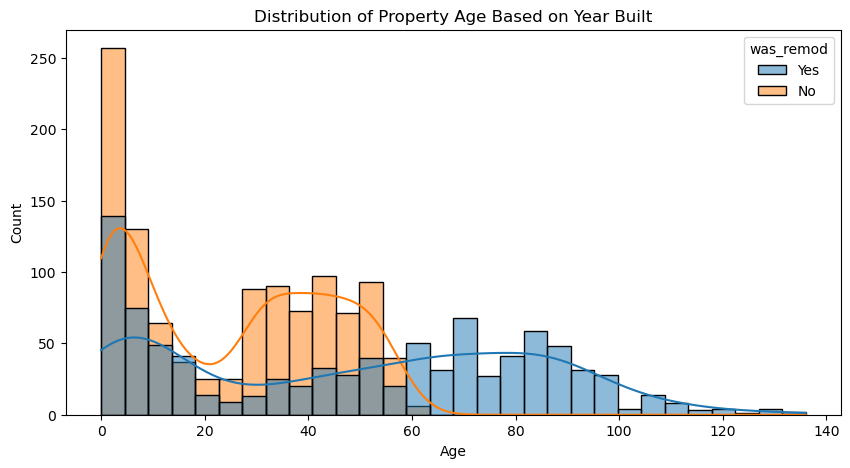

In [60]:
# Update labels
label_map = {0: 'No',
             1: 'Yes'}

descrip = hs['was_remod'].map(label_map)
plt.figure(figsize = (10, 5))
sns.histplot(x = hs['age'], hue = descrip, bins = 30, kde=True) # colors: https://matplotlib.org/stable/gallery/color/named_colors.html, kde: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Create a descriptive title
plt.title('Distribution of Property Age Based on Year Built')
plt.xlabel("Age");

<span style='color: blue'>**The highest count of properties was in the was in the lowest age bin, meaning that may houses in the dataset were built recently.**</span>

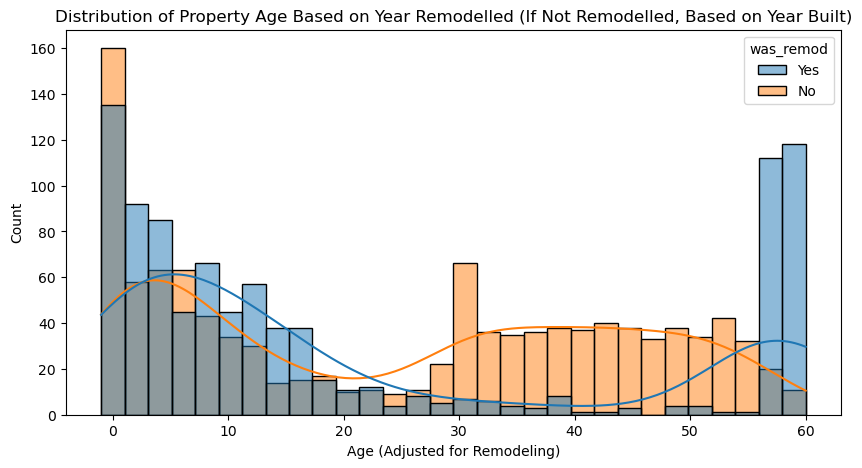

In [61]:
plt.figure(figsize = (10, 5))
sns.histplot(x = hs['age_adj'], hue = descrip, bins = 30, kde=True) # colors: https://matplotlib.org/stable/gallery/color/named_colors.html, kde: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Create a descriptive title
plt.title('Distribution of Property Age Based on Year Remodelled (If Not Remodelled, Based on Year Built)')
plt.xlabel("Age (Adjusted for Remodeling)");

<span style='color: blue'>**Accounting for remodelling, there were more counts of "young" properties, meaning that a fair number of properties (probably older properties) decided to remodel.**</span>

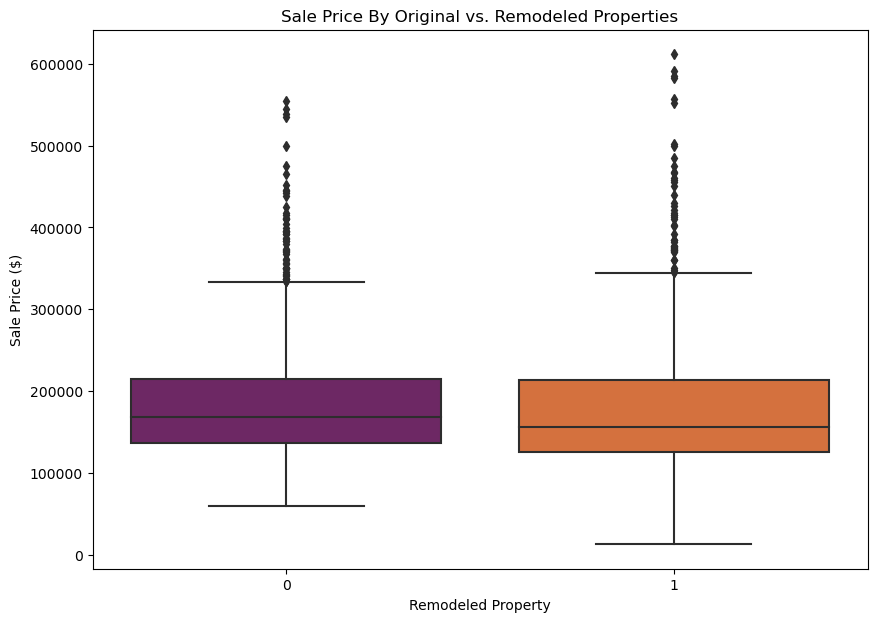

In [62]:
plt.figure(figsize = (10,7))
sns.boxplot(x=hs['was_remod'], y= hs['SalePrice'], palette='inferno')

plt.title("Sale Price By Original vs. Remodeled Properties")
plt.xlabel('Remodeled Property')
plt.ylabel('Sale Price ($)');

<span style='color: blue'>**Remodeled and non-remodelled (original) properties has similar median and upper/lower quartiles. Remodeled homes had a larger spread/range of sales prices, suggesting that remodelling can be a pathway to higher selling price.**</span>

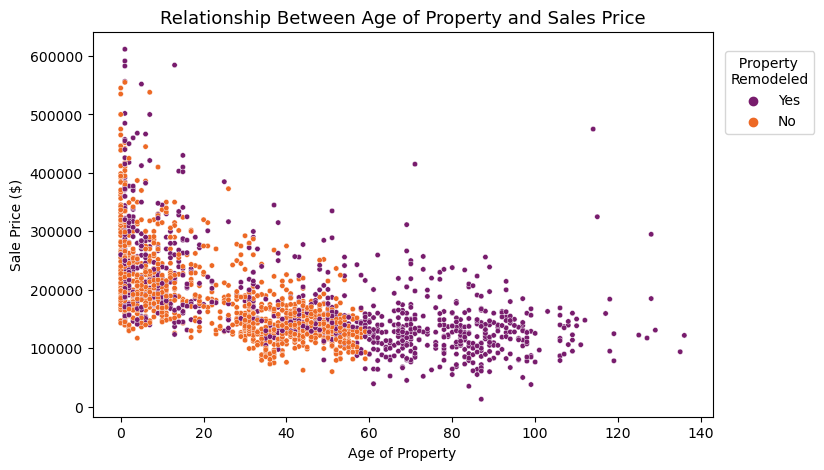

In [63]:
plt.figure(figsize = (8, 5))

sns.scatterplot(x = hs['age'], y = hs['SalePrice'], hue = descrip, palette = 'inferno', s=15)

# Create a descriptive title
plt.title('Relationship Between Age of Property and Sales Price', fontsize = 13)

# Add axis labels
plt.xlabel('Age of Property')
plt.ylabel('Sale Price ($)')

plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = '  Property\nRemodeled' ); 
plt.savefig('../images/age_salesprice.png', dpi=300, bbox_inches='tight')

<span style='color: blue'>**"Younger" properties had higher sales prices. As expected, older properties were more likely to remodel, though even with remodeling the sales prices were consistently relatively low.**</span>

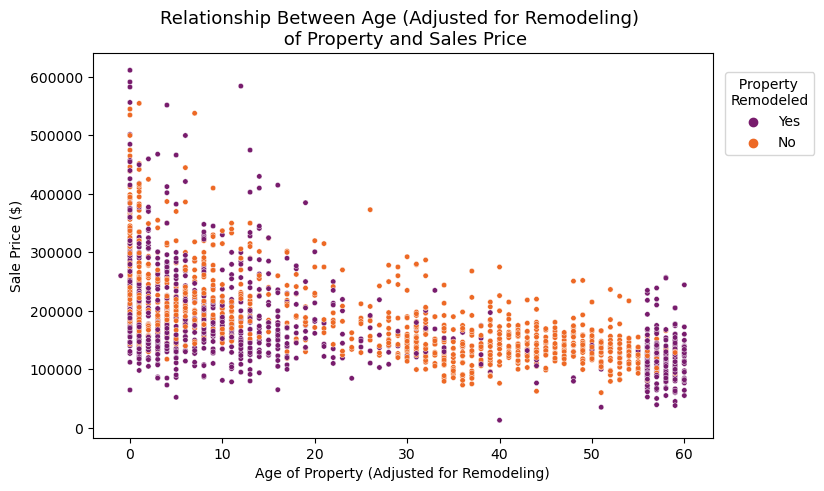

In [64]:
plt.figure(figsize = (8, 5))

# Update labels
label_map = {0: 'No',
             1: 'Yes'}

descrip = hs['was_remod'].map(label_map)
sns.scatterplot(x = hs['age_adj'], y = hs['SalePrice'], hue = descrip, palette = 'inferno', s=15)

# Create a descriptive title
plt.title('Relationship Between Age (Adjusted for Remodeling) \n of Property and Sales Price', fontsize = 13)

# Add axis labels
plt.xlabel('Age of Property (Adjusted for Remodeling)')
plt.ylabel('Sale Price ($)')

plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = '  Property\nRemodeled' ); 
plt.savefig('../images/adj_age_salesprice.png', dpi=300, bbox_inches='tight')

<span style='color: blue'>**Properties remodeled in the last 20 years had higher sales prices than properties remodeled before then. Properties built more recently and which were remodeled more recently had the strongest relationship with higher sales prices.**</span>

In [65]:
# Look at these houses by Quality and Condition
qual_adj = {
    1: "Below Avg to Poor",
    2: "Below Avg to Poor",
    3: "Below Avg to Poor",
    4: "Below Avg to Poor",
    5: "Avg to Above Avg",
    6: "Avg to Above Avg",
    7: "Good to Excellent+",
    8: "Good to Excellent+",
    9: "Good to Excellent+",
    10: "Good to Excellent+"
}

cond_adj = {
    1: "Below Avg to Poor",
    2: "Below Avg to Poor",
    3: "Below Avg to Poor",
    4: "Below Avg to Poor",
    5: "Avg to Above Avg",
    6: "Avg to Above Avg",
    7: "Good to Excellent+",
    8: "Good to Excellent+",
    9: "Good to Excellent+",
    10: "Good to Excellent+"
}

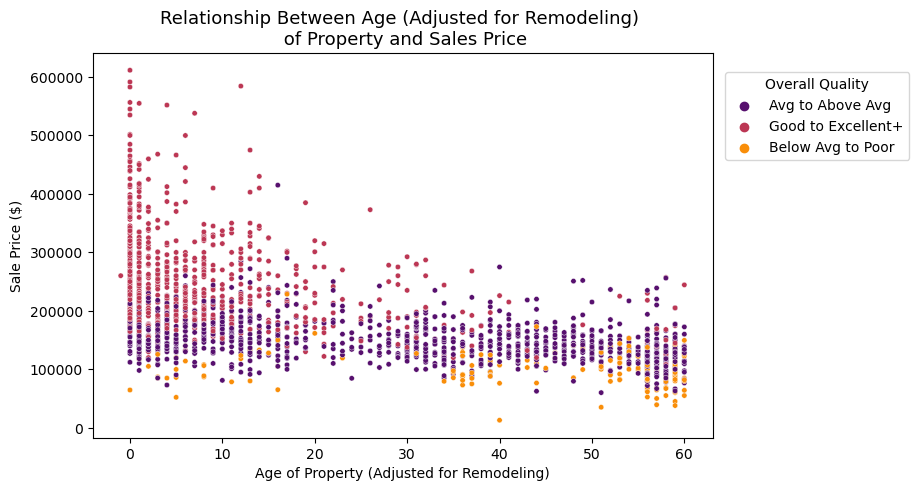

In [66]:
plt.figure(figsize = (8, 5))

qual_descrip = hs['Overall Qual'].map(qual_adj)
sns.scatterplot(x = hs['age_adj'], y = hs['SalePrice'], hue = qual_descrip, palette = 'inferno', s=15)

# Create a descriptive title
plt.title('Relationship Between Age (Adjusted for Remodeling) \n of Property and Sales Price', fontsize = 13)

# Add axis labels
plt.xlabel('Age of Property (Adjusted for Remodeling)')
plt.ylabel('Sale Price ($)')

plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'Overall Quality' ); 

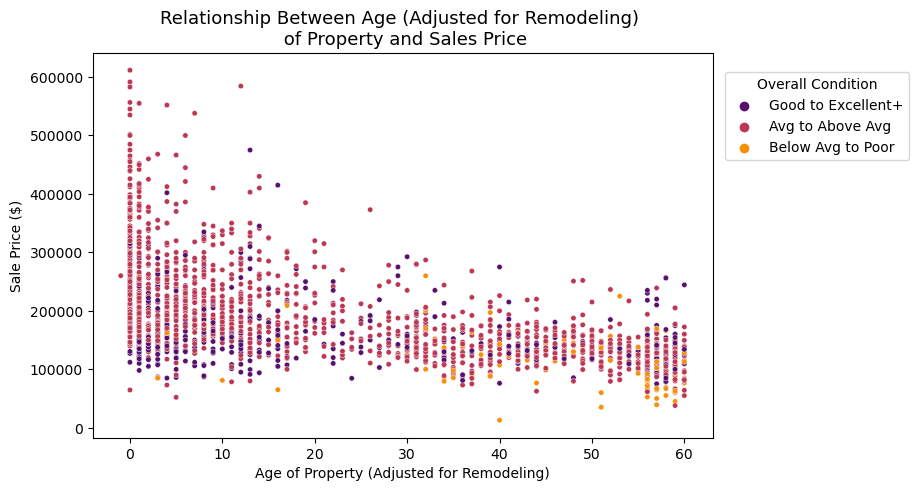

In [67]:
plt.figure(figsize = (8, 5))

cond_descrip = hs['Overall Cond'].map(cond_adj)
sns.scatterplot(x = hs['age_adj'], y = hs['SalePrice'], hue = cond_descrip, palette = 'inferno', s=15)

# Create a descriptive title
plt.title('Relationship Between Age (Adjusted for Remodeling) \n of Property and Sales Price', fontsize = 13)

# Add axis labels
plt.xlabel('Age of Property (Adjusted for Remodeling)')
plt.ylabel('Sale Price ($)')

plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'Overall Condition' ); 

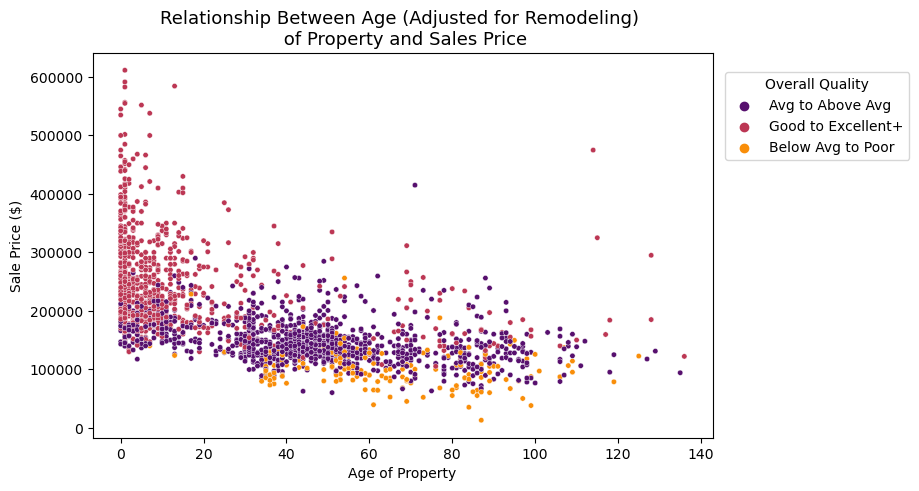

In [68]:
plt.figure(figsize = (8, 5))

qual_descrip = hs['Overall Qual'].map(qual_adj)
sns.scatterplot(x = hs['age'], y = hs['SalePrice'], hue = qual_descrip, palette = 'inferno', s=15)

# Create a descriptive title
plt.title('Relationship Between Age (Adjusted for Remodeling) \n of Property and Sales Price', fontsize = 13)

# Add axis labels
plt.xlabel('Age of Property')
plt.ylabel('Sale Price ($)')

plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'Overall Quality' ); 

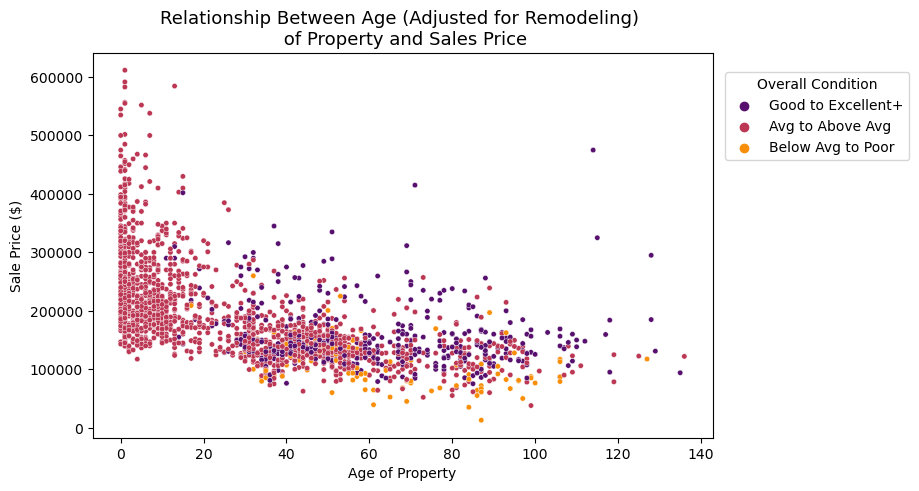

In [69]:
plt.figure(figsize = (8, 5))

cond_descrip = hs['Overall Cond'].map(cond_adj)
sns.scatterplot(x = hs['age'], y = hs['SalePrice'], hue = cond_descrip, palette = 'inferno', s=15)

# Create a descriptive title
plt.title('Relationship Between Age (Adjusted for Remodeling) \n of Property and Sales Price', fontsize = 13)

# Add axis labels
plt.xlabel('Age of Property')
plt.ylabel('Sale Price ($)')

plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, title = 'Overall Condition' ); 

<span style='color: blue'>**As expected, high Overall Quality scores were most correlated with higher sale price. Properties with highest sales prices had an Overall Condition of Average to Above average, few properties had Good to Excellent+ or Below Average to Poor overall condition scores. Even properties with relatively low sales prices mostly had an overall condition of Average to Above Average.**</span>

---
#### What Impact Does Having a Basement (Finished/Unfinished) Have on Price, How About a Fireplace, or Garage?

#### Basement

In [70]:
bsmt_cond = {
    'Ex': 5,      #Excellent
    'Gd': 4,      #Good
    'TA': 3,      #Typical
    'Fa': 2,      #Fair
    'Po': 1,      #Poor
    'NA': 0       #No basement
}

bsmt_fin_type = {
    'GLQ': 6,    #Good Living Quarters
    'ALQ': 5,    #Average Living Quarters
    'BLQ': 4,    #Below Average Living Quarters
    'Rec': 3,    #Average Rec Room
    'LwQ': 2,    #Low Quality
    'Unf': 1,    #Unfinished
    'NA': 0      #No basedment
}

# New vars
hs['bsmt_cond_num'] = hs['Bsmt Cond'].map(bsmt_cond)
hs['bsmt_fin_type_num'] = hs['BsmtFin Type 1'].map(bsmt_fin_type)
hs['bsmt_fin_area'] = hs['BsmtFin SF 1'] + hs['BsmtFin SF 2']

# Will not include these new vars in test.csv data - they will not be used in our model, as below we see that Total Bsmt SF has a more linear relationship than bsmt_fin_area. Also, will not be breaking down analysis into finished vs.
    # unfinished sqft, will move towards with Total Bsmt SF

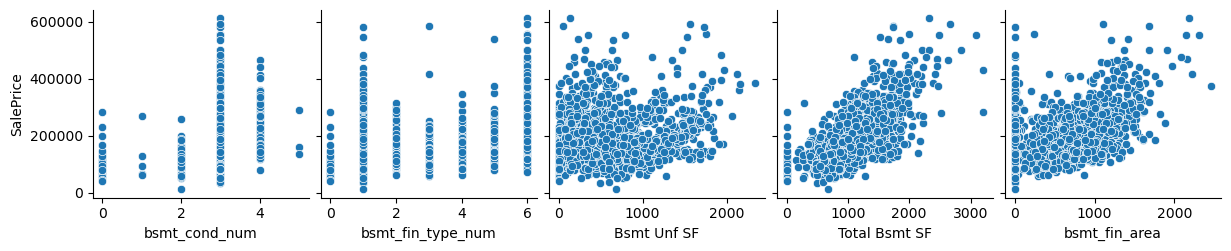

In [71]:
#feats_initial = ['Overall Qual', 'Year Built', 'Year Remod/Add', 'BsmtFin SF 1', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 'Fireplaces', 'Garage Area']
#extras = [bsmt_cond_num, bsmt_fin_type_num, 'Bsmt Unf SF', 'Total Bsmt SF', 'bsmt_fin_area']
extras = ['bsmt_cond_num', 'bsmt_fin_type_num', 'Bsmt Unf SF', 'Total Bsmt SF', 'bsmt_fin_area']

sns.pairplot(hs, x_vars=extras, y_vars = ['SalePrice']);

<span style='color: blue'>**Basements in "Typical" condition had the highest and most vass distribution of sales prices, perhaps suggesting that basements are important as a factor in the home in general, rather than needing to be in the best condition. Unfinished basements and good-quality basements have similar spreads in prices, suggesting once again the the presence of the feature itself is advantageous. A higher finished basement area and total basement area are positively correlated with sales price. Unfinished basement area square-footage has more of a scattered trend, indicating a weaker relationship with sales price.**</span>

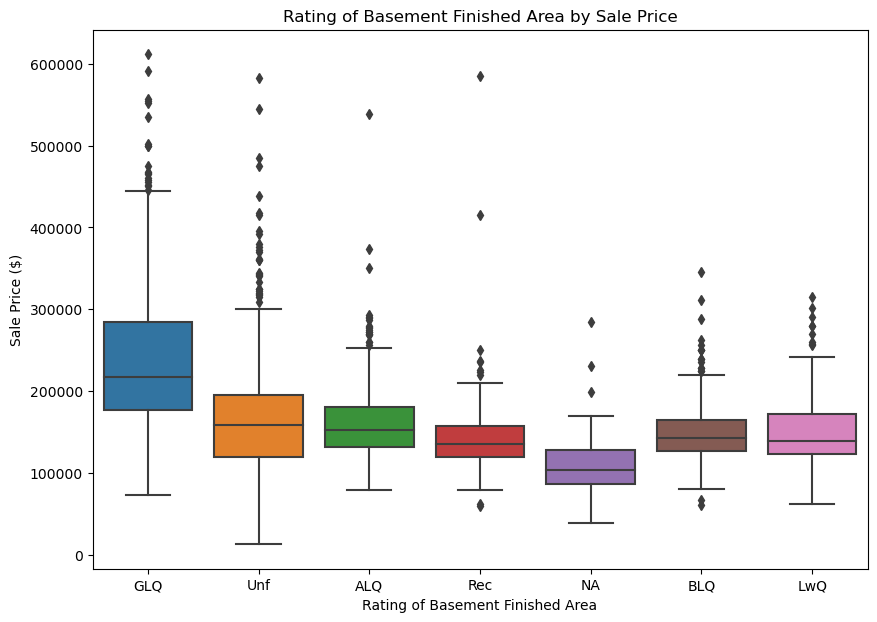

In [72]:
plt.figure(figsize = (10,7))
sns.boxplot(x=hs['BsmtFin Type 1'], y= hs['SalePrice'])

plt.title("Rating of Basement Finished Area by Sale Price")
plt.xlabel('Rating of Basement Finished Area')
plt.ylabel('Sale Price ($)');

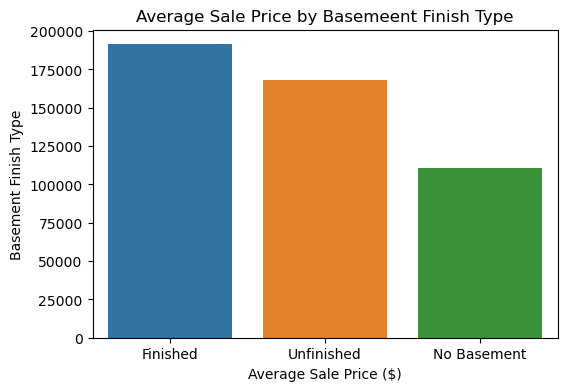

In [73]:
bsmt_cat = {
    'GLQ': 'Finished',    #Good Living Quarters
    'ALQ': 'Finished',    #Average Living Quarters
    'BLQ': 'Finished',    #Below Average Living Quarters
    'Rec': 'Finished',    #Average Rec Room
    'LwQ': 'Finished',    #Low Quality
    'Unf': 'Unfinished',  #Unfinished
    'NA': 'No Basement'   #No basedment
}

hs['bsmt_fin_cat'] = hs['BsmtFin Type 1'].map(bsmt_cat)

bsmt_fin_avg = hs.groupby('bsmt_fin_cat')['SalePrice'].mean().reset_index().sort_values(by="SalePrice", ascending=False)
plt.figure(figsize = (6,4))
sns.barplot(x=bsmt_fin_avg['bsmt_fin_cat'], y=bsmt_fin_avg['SalePrice'],  order=bsmt_fin_avg['bsmt_fin_cat'])

plt.title('Average Sale Price by Basemeent Finish Type', fontsize=12)

plt.xlabel('Average Sale Price ($)', fontsize=10)
plt.ylabel('Basement Finish Type', fontsize=10);

#plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper left', borderaxespad=0, labels=cond_label.values(), title = 'Basement' ); 

plt.savefig('../images/bsmt_finish_type.png', dpi=300, bbox_inches='tight')


<span style='color: blue'>**No-basement properties had the lowest median sale prices. Unfinished basements had a similar interquartile range to average and low-quality basements. This indicates that having a basement, even a low-quality one, was more advantageous than no basement. Good-Living-Quarter basements look the most correlated with high sales prices.**</span>

#### Garage

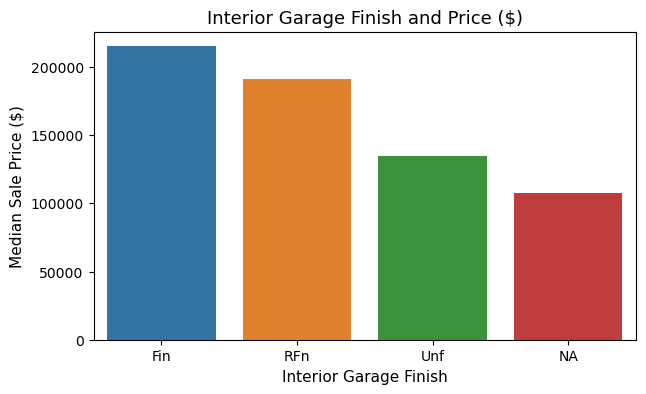

In [74]:
grg_price = hs.groupby('Garage Finish')['SalePrice'].median().reset_index().sort_values('SalePrice', ascending=False)

plt.figure(figsize = (7,4))
sns.barplot(x=grg_price['Garage Finish'], y=grg_price['SalePrice'])

plt.title('Interior Garage Finish and Price ($)', fontsize=13)

plt.xlabel('Interior Garage Finish', fontsize=11)
plt.ylabel('Median Sale Price ($)', fontsize=11);

<span style='color: blue'>**Properties with finished garages had the highest median sales prices, followed by rough finished, and unfinished. Properties with no garages had ~half the median sales price as properties with finished garages. Having a garage vs. not having a garage appears as if it may be a meaningful predictor of sale price.**</span>

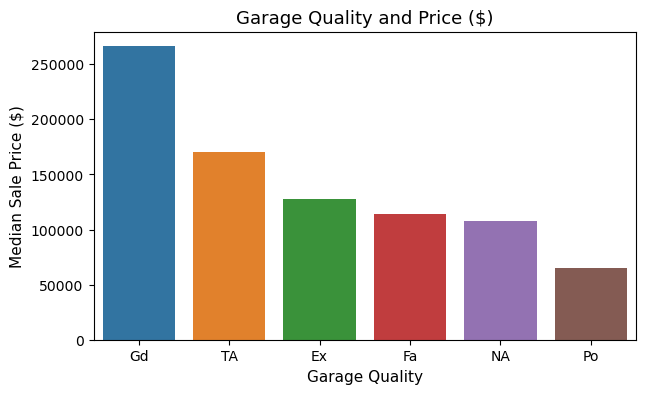

In [75]:
grg_qual = hs.groupby('Garage Qual')['SalePrice'].median().reset_index().sort_values('SalePrice', ascending=False)

plt.figure(figsize = (7,4))
sns.barplot(x=grg_qual['Garage Qual'], y=grg_qual['SalePrice'])

plt.title('Garage Quality and Price ($)', fontsize=13)

plt.xlabel('Garage Quality', fontsize=11)
plt.ylabel('Median Sale Price ($)', fontsize=11);

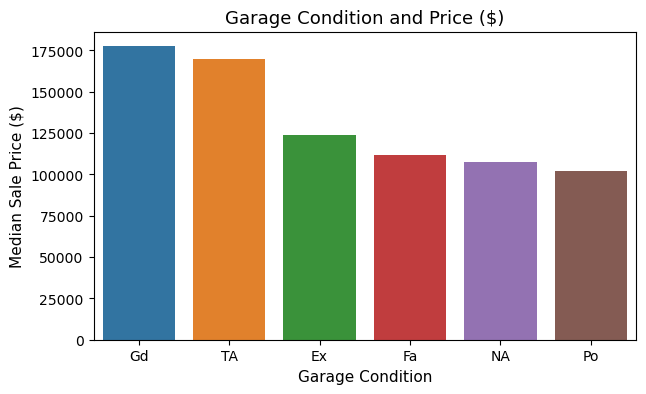

In [76]:
grg_cond = hs.groupby('Garage Cond')['SalePrice'].median().reset_index().sort_values('SalePrice', ascending=False)

plt.figure(figsize = (7,4))
sns.barplot(x=grg_cond['Garage Cond'], y=grg_cond['SalePrice'])

plt.title('Garage Condition and Price ($)', fontsize=13)

plt.xlabel('Garage Condition', fontsize=11)
plt.ylabel('Median Sale Price ($)', fontsize=11);

<span style='color: blue'>**Garage quality did not need to be Excellent to attain the highest median sales price. "Good" garages were associated with the highest priced properties, and having a poor quality garage actually fared worse than no garage. Garage condition also did not need to be Excellent to attain the higher sales prices, Good and Typical condition garages sufficed.**</span>

#### Fireplaces

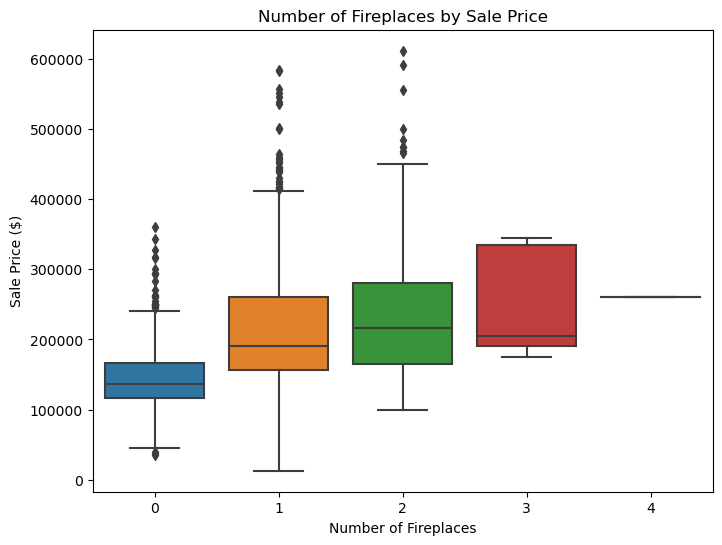

In [77]:
plt.figure(figsize = (8,6))
sns.boxplot(x=hs['Fireplaces'], y= hs['SalePrice'])

plt.title("Number of Fireplaces by Sale Price")
plt.xlabel('Number of Fireplaces')
plt.ylabel('Sale Price ($)');

<span style='color: blue'>**Having a fireplace vs. not having one appears to be a potential predictor of higher sales price. These distributions are quite right skewed, anywhere from 1-3 fireplaces could be predictive of higher sale prices. One fireplace is assocated with very low, but also very high sales price values, 2-3 fireplaces have a tighter range, but both skew towards higher prices.**</span>

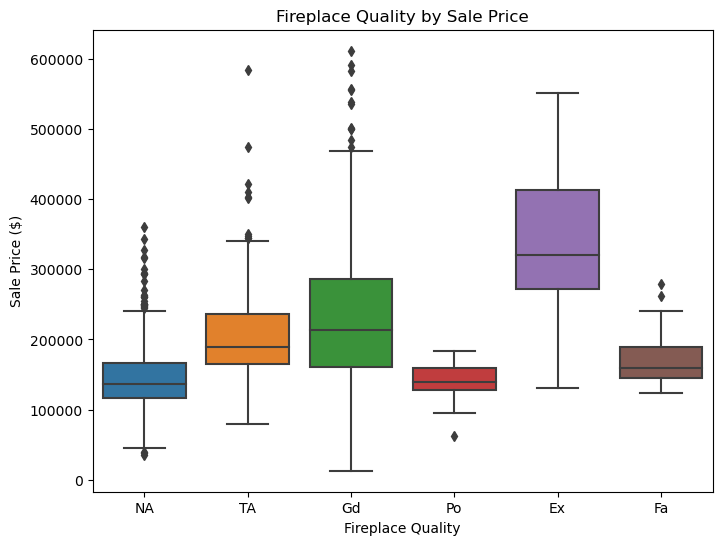

In [78]:
plt.figure(figsize = (8,6))
sns.boxplot(x=hs['Fireplace Qu'], y= hs['SalePrice'])

plt.title("Fireplace Quality by Sale Price")
plt.xlabel('Fireplace Quality')
plt.ylabel('Sale Price ($)');

plt.savefig('../images/fireplace_quality.png', dpi=300, bbox_inches='tight')

<span style='color: blue'>**Having a Poor or Fair fireplace did not fare much better than having no fireplace. Excellent, Good, or at the very least, Typical fireplaces seem the most positively correlated with sales price.** </span>

#### Kitchen

In [79]:
hs['Kitchen AbvGr'].value_counts()

1    1936
2      86
0       2
3       1
Name: Kitchen AbvGr, dtype: int64

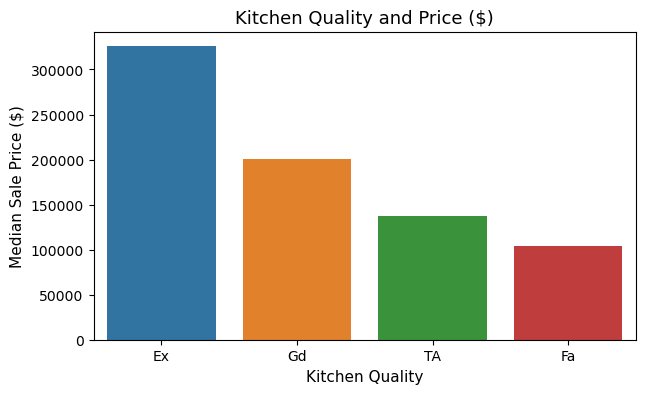

In [80]:
kit_qual = hs.groupby('Kitchen Qual')['SalePrice'].median().reset_index().sort_values('SalePrice', ascending=False)

plt.figure(figsize = (7,4))
sns.barplot(x=kit_qual['Kitchen Qual'], y=kit_qual['SalePrice'])

plt.title('Kitchen Quality and Price ($)', fontsize=13)

plt.xlabel('Kitchen Quality', fontsize=11)
plt.ylabel('Median Sale Price ($)', fontsize=11);

plt.savefig('../images/kitchen.png', dpi=300, bbox_inches='tight')

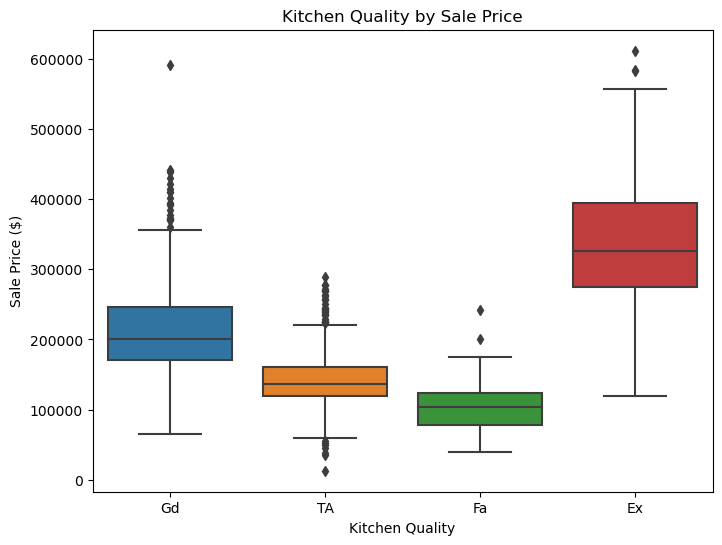

In [81]:
# Boxplot for presentation
plt.figure(figsize = (8,6))
sns.boxplot(x=hs['Kitchen Qual'], y= hs['SalePrice'])

plt.title("Kitchen Quality by Sale Price")
plt.xlabel('Kitchen Quality')
plt.ylabel('Sale Price ($)');

plt.savefig('../images/kitchen2.png', dpi=300, bbox_inches='tight')

<span style='color: blue'>**Median sales price was highest for properties with an Excellent kitchen. The difference in median sale price between Excellent and Good kitchens was ~$100k on average. A high-quality kitchen may be something we want to include in our model as a predictor of sale price.**</span>

In [82]:
hs = hs.drop(columns=['z_area', 'z_lota', 'z_gara', 'bsmt_fin_type_num', 'bsmt_fin_area'])

# Now that initial exploration is done, for next level of feature engineering, we can make variables in snake case
hs.columns = hs.columns.str.lower().str.replace(' ', '_')
hs_test.columns = hs_test.columns.str.lower().str.replace(' ', '_')

hs.rename(columns={'year_remod/add': 'year_remod'}, inplace=True)
hs_test.rename(columns={'year_remod/add': 'year_remod'}, inplace=True)

#lets leave SalePrice and Id as is
hs.rename(columns={'saleprice': 'SalePrice'}, inplace=True)
hs_test.rename(columns={'saleprice': 'SalePrice'}, inplace=True)

hs.rename(columns={'id': 'Id'}, inplace=True)
hs_test.rename(columns={'id': 'Id'}, inplace=True)

In [83]:
hs.to_csv('../datasets/Clean/train1.csv', index=False)
hs_test.to_csv('../datasets/Clean/test1.csv', index=False)

<span style='color:blue'> **This data is now ready for further manipulation and engineering before modeling** </span>